# Student Grade Regression - Portuguese

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

from collections import Counter
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## 2. Load and Summarize Data

In [2]:
# Load dataframe (df)
df = pd.read_csv('student-por.csv')

In [3]:
df

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        4   0  11  11  
1    ...      5        3      3     1     1      3        2   9  11  11  
2    ...      4        3      2     2     3      3        6  12  13  12  
3    ...      3        2      2     1     1      5        0  14  14  14  
4    ...      4        3      2     1     2      5        0  11  13  13  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
644  ...      5        4      2     1     2      5        4  10  11  10  
645  ...      4        3      4     1     1      1        4  15  15  16  
646  ...      1        1      1     1     1      5        6  11  12   9  
647  ...      2        4      5     3     4      2        6  10  10  10  
648  ...      4        4      1     3     4      5        4  10  11  11  

[649 rows x 33 columns]

In [4]:
# Brief info about dataframe - non-null values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
# Check for missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
# # -- Drop/impute missing data (if required) --

# # Drop rows with missing values
# df = df.dropna(axis=0, how='any')

# # ['mean', 'median', 'most_frequent', 'constant']
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
# imputer.fit_transform(df)
# df = imputer.transform(df)

# df.isnull().sum()

In [7]:
# Dataframe statistics on quantitative (numerical) values
df.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.051093    1.175766    0.924834    1.284380    1.446259   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    2.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  649.000000  649.000000  649.000000  649.000000  
mean     3.659476   11.399076   11.570108   11.906009  
std      4.640759    2.745265    2.913639    3.230656  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000   10.000000   10.000000   10.000000  
50%      2.000000   11.000000   11.000000   12.000000  
75%      6.000000   13.000000   13.000000   14.000000  
max     32.000000   19.000000   19.000000   19.000000

In [8]:
# Get values for matrix of features (X) and dependent variable (y)
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

print(X.shape, y.shape)

(649, 32) (649,)


## 3. Visualize Data

#### **Visualization Labels**

In [9]:
# Gender: Male or Female
gender_labels = ['F - Female', 'M - Male']
# Number of Failures
failure_labels = ['0 failures', '1 failure', '2 failures', '3 failures']

#### Age Distribution

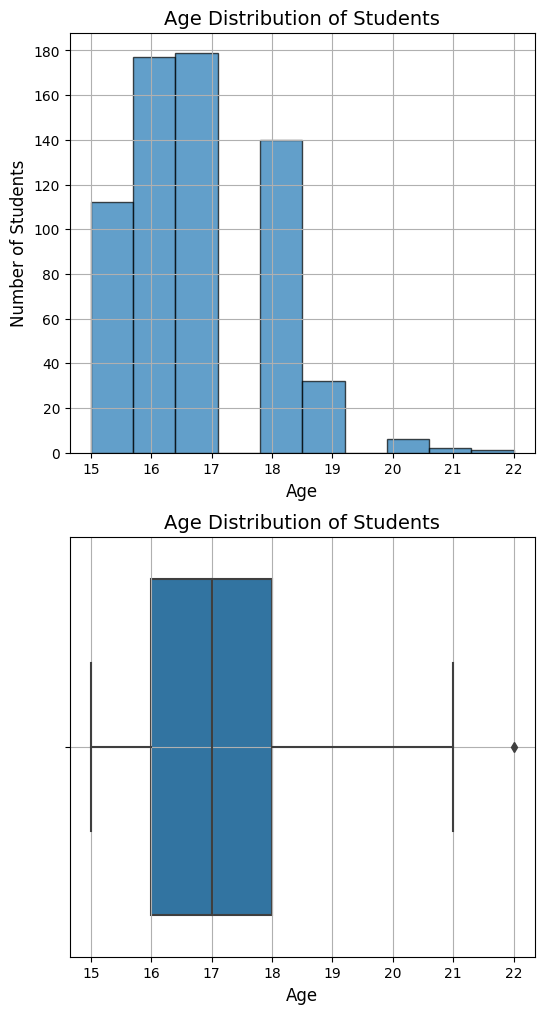

In [10]:
# Define subplot
age_dist = plt.figure(figsize=(6, 12))

# Age distribution histogram
ax1 = age_dist.add_subplot(2, 1, 1)
ax1 = plt.hist(x=df['age'], alpha=0.7, edgecolor='black')
# Adjust Y-Axis range
plt.yticks(np.arange(0, 200, 20))
# Plot title and labels
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Age Distribution of Students', fontsize=14)
# Plot grid
plt.grid(True)

# Age distribution box plot
ax2 = age_dist.add_subplot(2, 1, 2)
ax2 = sns.boxplot(x=df['age'])
# Adjust Y-Axis range
plt.xticks(np.arange(15, 23, 1))
# Plot title and label
plt.xlabel('Age', fontsize=12)
plt.title('Age Distribution of Students', fontsize=14)
# Plot grid
plt.grid(True)

# Show subplot
plt.show()

#### Gender Distribution

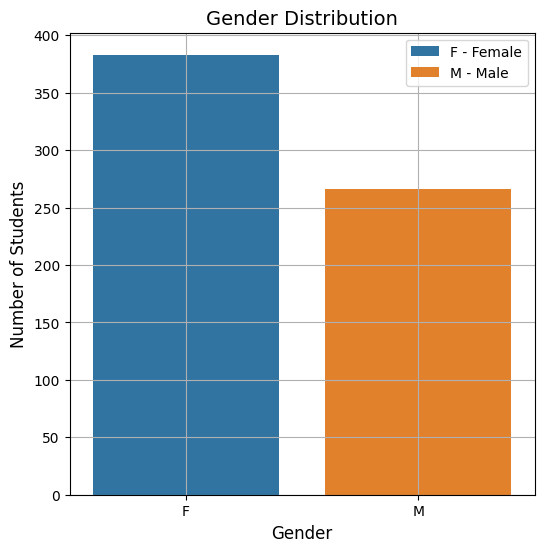

In [11]:
# Define figure
gender_dist = plt.figure(figsize=(6, 6))

# Gender distribution
gender_dist = sns.countplot(x=df['sex'], hue=df['sex'], dodge=False)
# Adjust Y-Axis range
plt.yticks(np.arange(0, 450, 50))
# Plot title and labels
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Gender Distribution', fontsize=14)
# Plot legend and grid
plt.legend(labels=gender_labels, loc='upper right')
plt.grid(True)

# Show figure
plt.show()

#### Extracurricular Activities

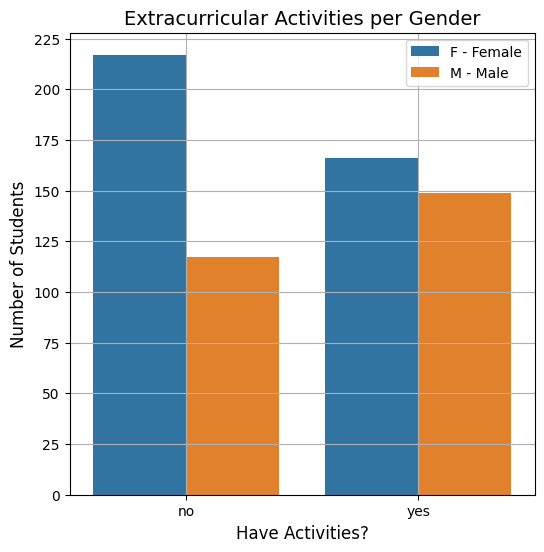

In [12]:
# Define figure
ea_dist = plt.figure(figsize=(6, 6))

# Extracurricular Activities distribution
ea_dist = sns.countplot(x=df['activities'], hue=df['sex'], dodge=True)
# Adjust Y-Axis range
plt.yticks(np.arange(0, 250, 25))
# Plot title and labels
plt.xlabel('Have Activities?', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Extracurricular Activities per Gender', fontsize=14)
# Plot legend and grid
plt.legend(labels=gender_labels, loc='upper right')
plt.grid(True)

# Show figure
plt.show()

#### Travel Time from Home to School

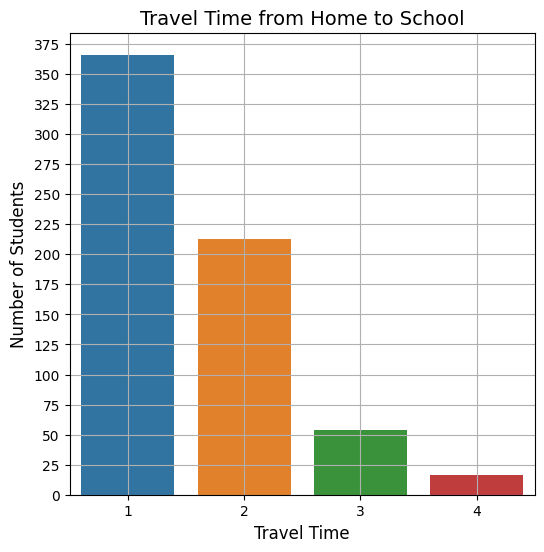

In [13]:
# Define figure
travel_time = plt.figure(figsize=(6, 6))

# Travel Time distribution
travel_time = sns.countplot(x=df['traveltime'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 400, 25))
# Plot title and labels
plt.xlabel('Travel Time', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Travel Time from Home to School', fontsize=14)
# Plot grid
plt.grid(True)

# Show figure
plt.show()

##### **Travel Time:**

- **1:** <15 minutes
- **2:** 15-30 minutes
- **3:** 30 minutes - 1 hour
- **4:** >1 hour

#### Weekly Studying Time 

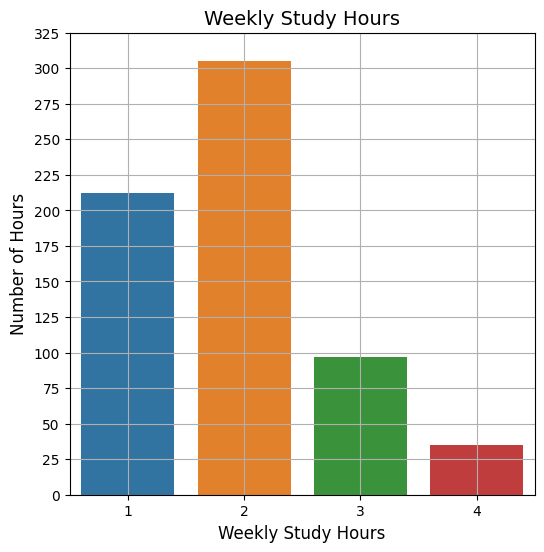

In [14]:
# Define figure
weekly_study_time = plt.figure(figsize=(6, 6))

# Weekly Study Time distribution
weekly_study_time = sns.countplot(x=df['studytime'], dodge=True)
# Adjust Y-Axis range
plt.yticks(np.arange(0, 350, 25))
# Plot title and labels
plt.xlabel('Weekly Study Hours', fontsize=12)
plt.ylabel('Number of Hours', fontsize=12)
plt.title('Weekly Study Hours', fontsize=14)
# Plot grid
plt.grid(True)

# Show figure
plt.show()

##### **Weekly Study Hours:**

- **1:** <2 hours
- **2:** 2-5 hours
- **3:** 5-10 hours
- **4:** >10 hours

#### Average Number of Absences per Age

<ipython-input-15-4dbc6ed6ed76>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['age'], y=df['absences'], hue=df['sex'], ci=None)


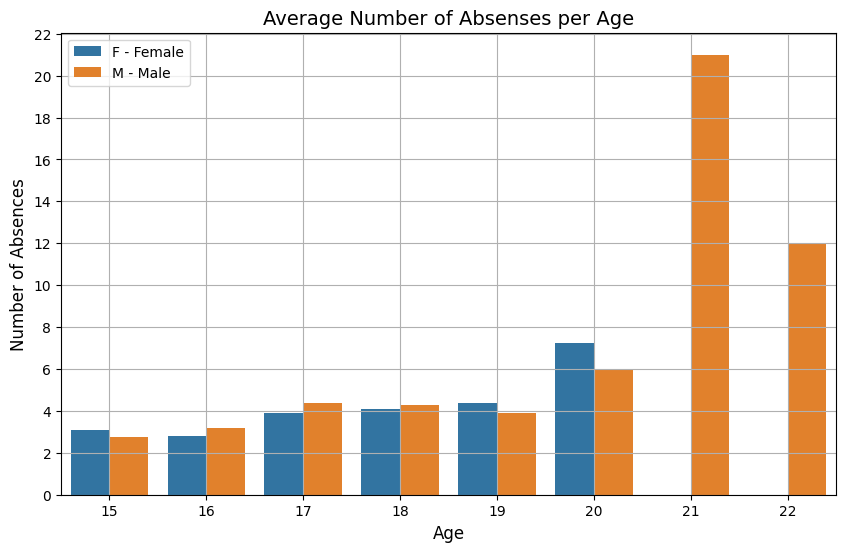

In [15]:
# Define figure
plt.figure(figsize=(10, 6))

# Average Number of Absences distribution
sns.barplot(x=df['age'], y=df['absences'], hue=df['sex'], ci=None)
# Adjust Y-Axis range
plt.yticks(np.arange(0, 24, 2))
# Plot title and labels
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Absences', fontsize=12)
plt.title('Average Number of Absenses per Age', fontsize=14)
# Plot legend and grid
plt.legend(labels=gender_labels, loc='upper left')
plt.grid(True)

# Show figure
plt.show()

#### Number of Absences Percentile Distribution

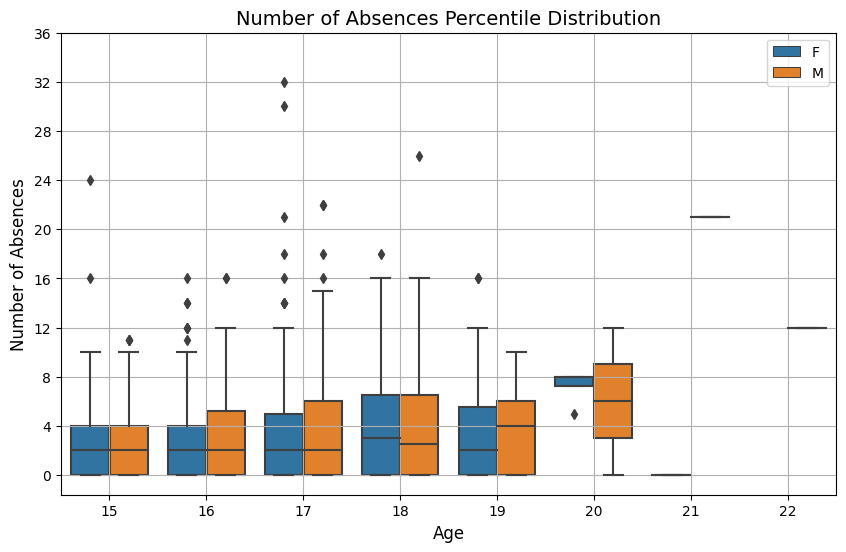

In [16]:
# Define figure
plt.figure(figsize=(10, 6))

# Number of Absences Percentile Distribution (box plot)
sns.boxplot(x=df['age'], y=df['absences'], hue=df['sex'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 40, 4))
# Plot title and labels
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Absences', fontsize=12)
plt.title('Number of Absences Percentile Distribution', fontsize=14)
# Plot legend and grid
plt.legend(loc='upper right')
plt.grid(True)

# Show figure
plt.show()

#### Number of Failures per Age

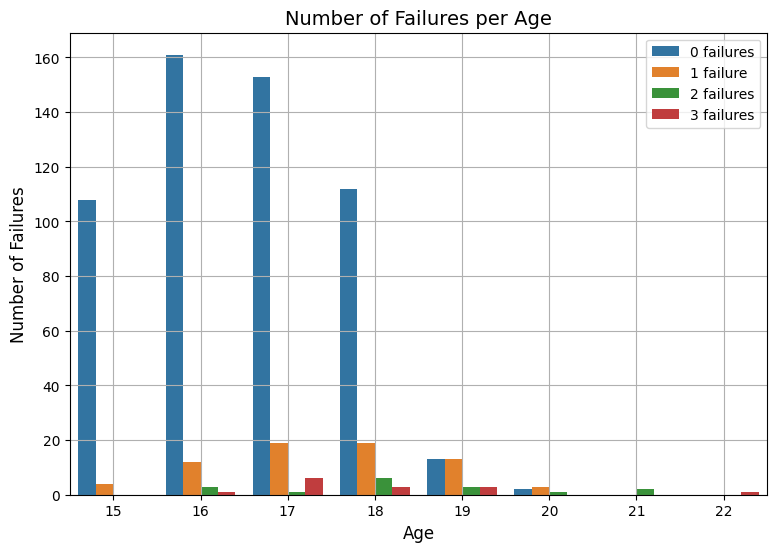

In [17]:
# Define figure
plt.figure(figsize=(9, 6))

# Number of failure rates per age
sns.countplot(x=df['age'], hue=df['failures'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 180, 20))
# Plot title and labels
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Failures', fontsize=12)
plt.title('Number of Failures per Age', fontsize=14)
# Plot legend and grid
plt.legend(labels=failure_labels, loc='upper right')
plt.grid(True)

# Show figure
plt.show()

#### Pairwise Relationships Between Absenses and Grades

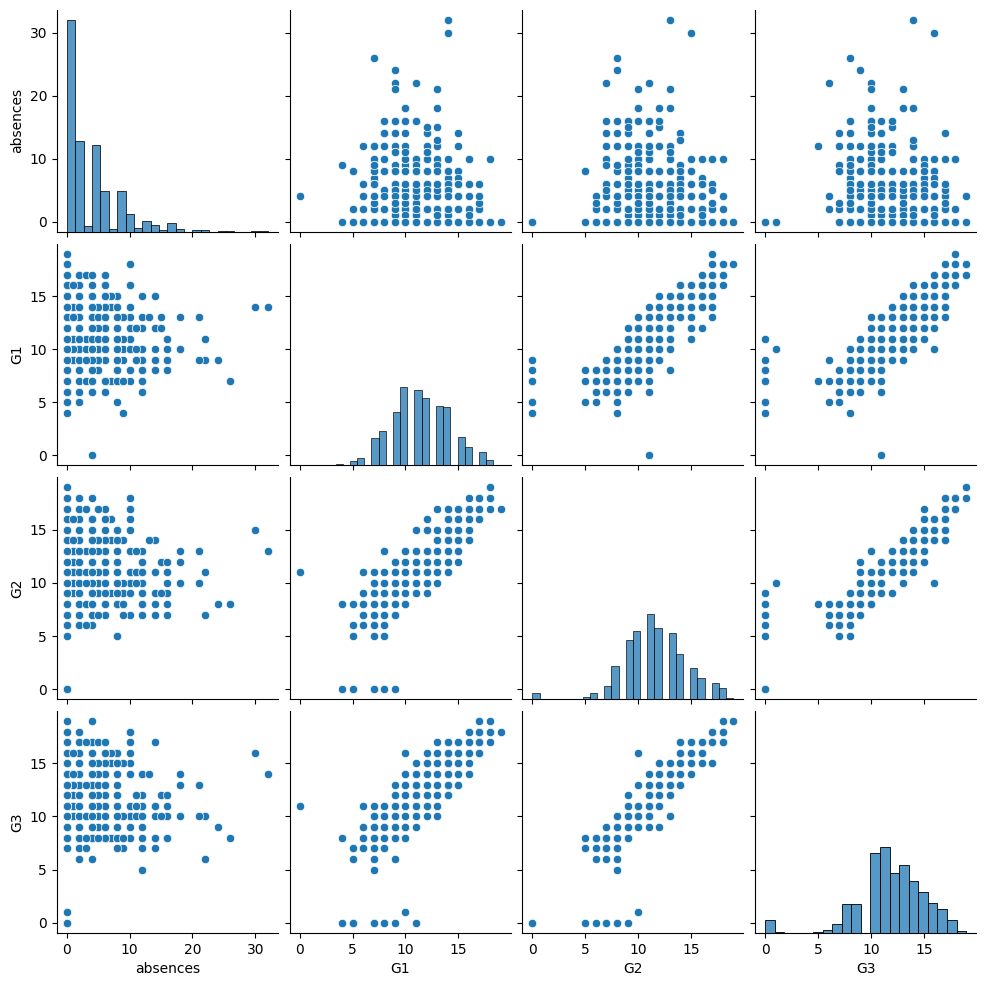

In [18]:
# Pairwise distributions
df_pairplot = df[['absences', 'G1', 'G2', 'G3']]
sns.pairplot(df_pairplot)
# Adjust X and Y-Axies (if required)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Show figure
plt.show()

#### Absenses and Grades

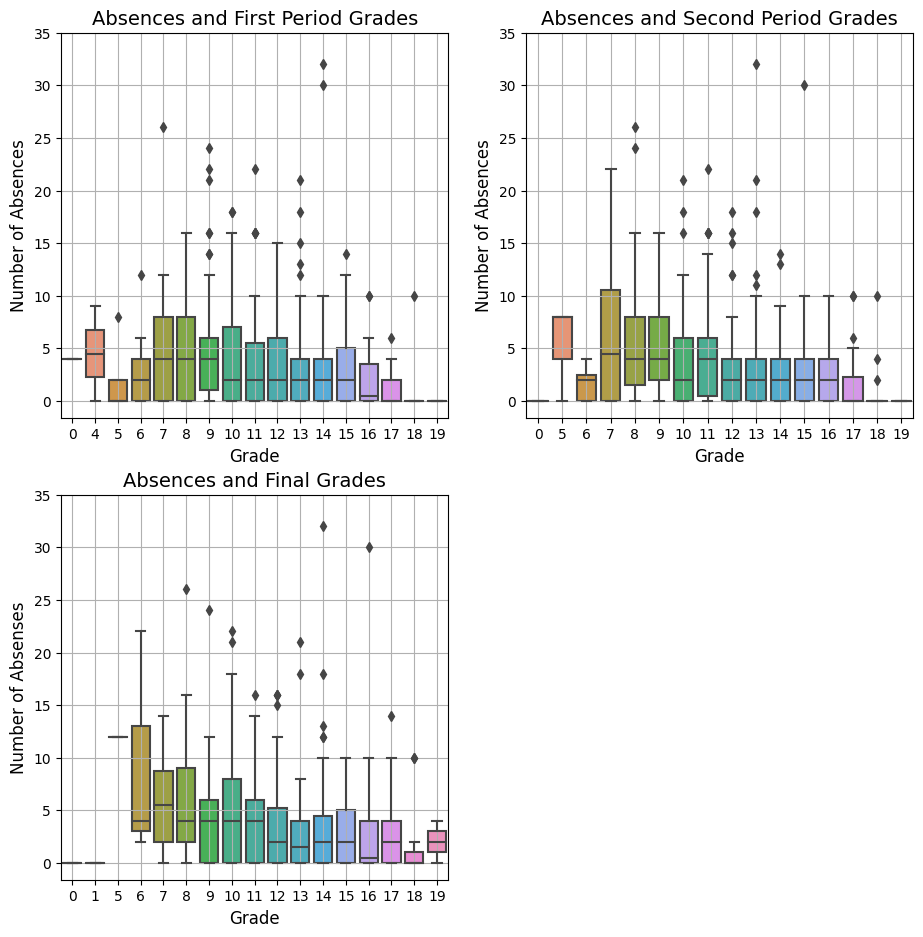

In [19]:
# Define subplot
absences_and_grades = plt.figure(figsize=(11, 11))

# First period grades
ax1 = absences_and_grades.add_subplot(2, 2, 1)
ax1 = sns.boxplot(x=df['G1'], y=df['absences'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 40, 5))
# Plot title and labels
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Absences', fontsize=12)
plt.title('Absences and First Period Grades', fontsize=14)
# Plot grid
plt.grid(True)

# Second period grades
ax2 = absences_and_grades.add_subplot(2, 2, 2)
ax2 = sns.boxplot(x=df['G2'], y=df['absences'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 40, 5))
# Plot title and labels
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Absences', fontsize=12)
plt.title('Absences and Second Period Grades', fontsize=14)
# Plot grid
plt.grid(True)

# Final grades
ax3 = absences_and_grades.add_subplot(2, 2, 3)
ax3 = sns.boxplot(x=df['G3'], y=df['absences'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 40, 5))
# Plot title and labels
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Absenses', fontsize=12)
plt.title('Absences and Final Grades', fontsize=14)
# Plot grid
plt.grid(True)

# Show subplot
plt.show()

#### Grades Distribution

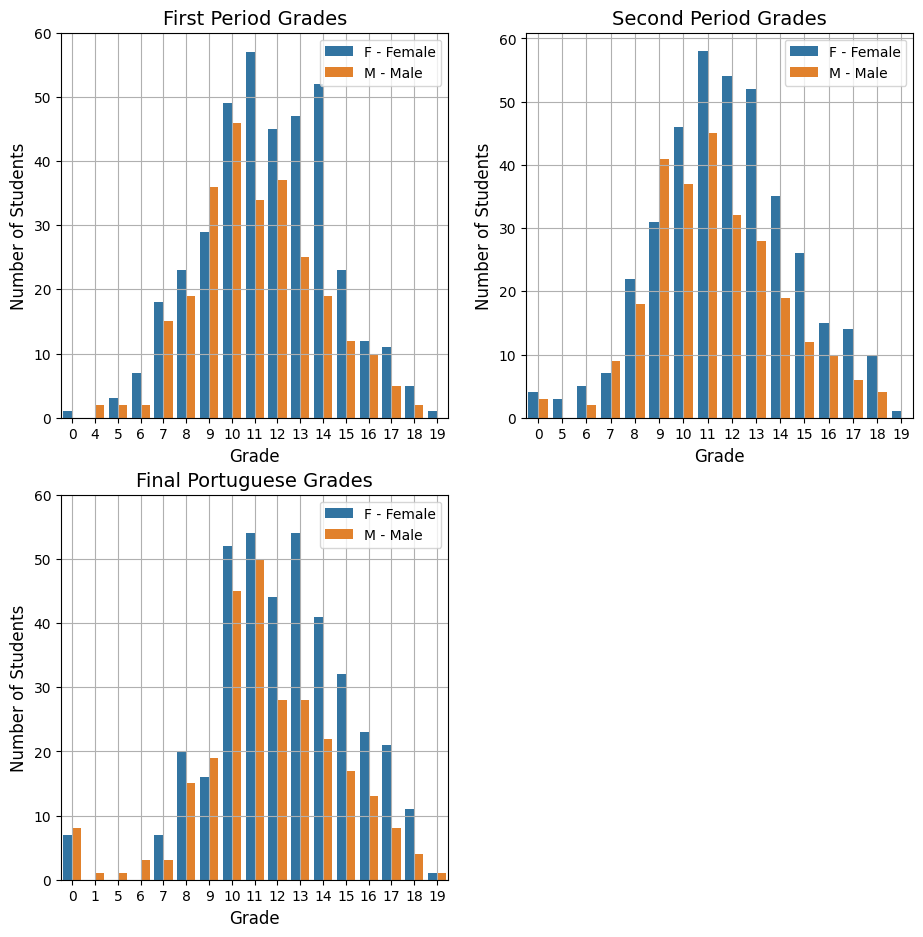

In [20]:
# Define subplot
por_grades = plt.figure(figsize=(11, 11))

# First period grades
ax1 = por_grades.add_subplot(2, 2, 1)
ax1 = sns.countplot(x=df['G1'], hue=df['sex'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 70, 10))
# Plot title and labels
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('First Period Grades', fontsize=14)
# Plot legend and grid
plt.legend(labels=gender_labels, loc='upper right')
plt.grid(True)

# Second period grades
ax2 = por_grades.add_subplot(2, 2, 2)
ax2 = sns.countplot(x=df['G2'], hue=df['sex'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 70, 10))
# Plot title and labels
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Second Period Grades', fontsize=14)
# Plot legend and grid
plt.legend(labels=gender_labels, loc='upper right')
plt.grid(True)

# Final grades
ax3 = por_grades.add_subplot(2, 2, 3)
ax3 = sns.countplot(x=df['G3'], hue=df['sex'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 70, 10))
# Plot title and labels
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Final Portuguese Grades', fontsize=14)
# Plot legend and grid
plt.legend(labels=gender_labels, loc='upper right')
plt.grid(True)

# Show subplot
plt.show()

#### Correlation Map

<ipython-input-21-65fc5eee4c20>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='YlGn', annot=True, fmt = ".2f")


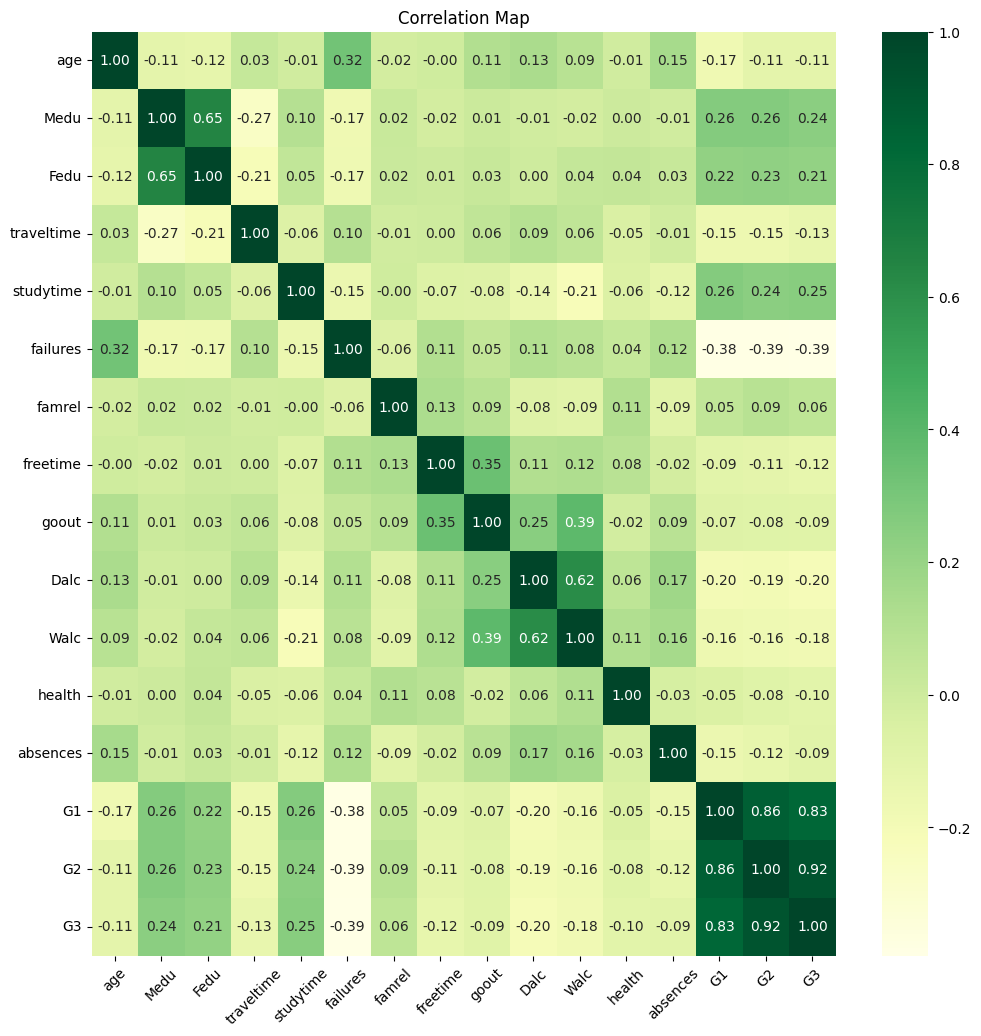

In [21]:
# Define correlation map figure
plt.figure(figsize=(12,12))

# Correlation Map
sns.heatmap(df.corr(), cmap='YlGn', annot=True, fmt = ".2f")
# Adjust X and Y-Axes (if required)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
# Plot title
plt.title('Correlation Map')

# Show figure
plt.show()

## 4. Data Preprocessing and Feature Engineering

In [22]:
# Label Encode Columns, Indices: 0-1, 3-5, 15-22
le = LabelEncoder()
le_columns = [0, 1, 3, 4, 5, 8, 9, 10, 11, 15, 16, 17, 18, 19, 20, 21, 22]

# Apply Label Encoding 
for i in le_columns:
  X[:, i] = le.fit_transform(X[:, i])

print(X)

[[0 0 18 ... 4 0 11]
 [0 0 17 ... 2 9 11]
 [0 0 15 ... 6 12 13]
 ...
 [1 0 18 ... 6 11 12]
 [1 1 17 ... 6 10 10]
 [1 1 18 ... 4 10 11]]


In [23]:
# Split dataframe (df) into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

In [24]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## 5. Define and Evalutate Models

In [25]:
# Linear Regression (LR)
from sklearn.linear_model import LinearRegression
# Support Vector Machine - Regression (SVR)
from sklearn.svm import SVR
# Decision Tree (DT)
from sklearn.tree import DecisionTreeRegressor
# Random Forest (RF)
from sklearn.ensemble import RandomForestRegressor
# XGBoost (XGB)
import xgboost as xgb
from xgboost import XGBRegressor
# Deep Neural Network (DNN)
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Additional Libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#### **Set Scoring Metric**

In [26]:
# -- R^2 Score --
metric = 'r2'

# -- Root Mean Squared Error (RMSE) --
# metric = 'rmse'

#### **Important Functions**

In [27]:
# Summarize prediction results
def summarize_results(model):
  """
  model - Summarize results for Machine Learning model
  """

  # Mean Absolute Error (MAE)
  print('MAE: %.3f' % (mean_absolute_error(y_test, model)))
  # Mean Squared Error (MSE)
  print('MSE: %.3f' % (mean_squared_error(y_test, model)))
  # Root Mean Squared Error (RMSE)
  print('RMSE: %.3f' % (mean_squared_error(y_test, model, squared=False)))
  # R^2 Score (Goodness-of-Fit)
  print('R^2 Score: %.3f' % (r2_score(y_test, model)))

In [28]:
# Plot prediction and validation distributions
def plot_dist(model, colour, a, x_range, y_range):
  """
  model   - Machine Learning model implemented
  colour  - Colour for predictions
  a       - Colour adjustment for predictions (alpha)
  x_range - X-Axis range of values
  y_range - Y-Axis range of values
  """
  
  # Define subplot
  fig = plt.figure(figsize=(15, 12))

  # Histogram for predicted model
  ax1 = fig.add_subplot(2, 2, 1)
  ax1 = plt.hist(x=model, facecolor=colour, alpha=a, edgecolor='black')
  # Adjust axes range(s)
  plt.xticks(x_range)
  plt.yticks(y_range)
  # Plot title and label(s)
  plt.xlabel('Grade', fontsize=12)
  plt.ylabel('Number of Students', fontsize=12)
  plt.title('Predicted Grade Distribution', fontsize=14)
  # Plot grid
  plt.grid(True)

  # Histogram for y_test
  ax2 = fig.add_subplot(2, 2, 2)
  ax2 = plt.hist(x=y_test, facecolor='orange', alpha=0.6, edgecolor='black')
  # Adjust axes range(s)
  plt.xticks(x_range)
  plt.yticks(y_range)
  # Plot title and label(s)
  plt.xlabel('Grade', fontsize=12)
  plt.ylabel('Number of Students', fontsize=12)
  plt.title('Validation Grade Distribution', fontsize=14)
  # Plot grid
  plt.grid(True)

  # Box plot for predicted model
  ax3 = fig.add_subplot(2, 2, 3)
  ax3 = sns.boxplot(x=model, color=colour)
  # Adjust axes range(s)
  plt.xticks(x_range)
  # Plot title and label(s)
  plt.xlabel('Grade', fontsize=12)
  plt.title('Predicted Grade Distribution', fontsize=14)
  # Plot grid
  plt.grid(True)

  # Box plot for y_test
  ax4 = fig.add_subplot(2, 2, 4)
  ax4 = sns.boxplot(x=y_test, color='orange')
  # Adjust axes range(s)
  plt.xticks(x_range)
  # Plot title and label(s)
  plt.xlabel('Grade', fontsize=12)
  plt.title('Validation Grade Distribution', fontsize=14)
  # Plot grid
  plt.grid(True)

  # Return figure to show
  return fig

In [29]:
# Plot results trends
def pred_results(model, pred, y_range, train_window, test_window, 
                 train_legend_loc, test_legend_loc):
  """
  model            - Machine Learning model implemented
  pred             - Model predictions
  y_range          - Y-Axis range of values
  train_window     - Extra space for legend (training set)
  test_window      - Extra space for legend (test set)
  train_legend_loc - Legend location for training set prediction trends
  test_legend_loc  - Legend location for test set prediction trends
  """

  # Define subplot
  results_fig = plt.figure(figsize=(16, 12))

  # Training set plot
  ax1 = results_fig.add_subplot(2, 1, 1)
  plt.plot(y_train, color = 'red', label = 'Training Set')
  plt.plot(model.predict(X_train), color = 'blue', label = 'Prediction')
  # Adjust axes range(s)
  plt.xticks(np.arange(0, len(X_train)+train_window, 25))
  plt.yticks(y_range)
  # Plot title and label(s)
  plt.xlabel('Number of Students', fontsize=12)
  plt.ylabel('Grade', fontsize=12)
  plt.title('Predicted Final Grades', fontsize=14)
  # Legend and grid
  plt.legend(loc=train_legend_loc)
  plt.grid(True)

  # Test set plot
  ax2 = results_fig.add_subplot(2, 1, 2)
  plt.plot(y_test, color = 'red', label = 'Test Set')
  plt.plot(pred, color = 'blue', label = 'Prediction')
  # Adjust axes range(s)
  plt.xticks(np.arange(0, len(y_test)+test_window, test_window))
  plt.yticks(y_range)
  # Plot title and labels
  plt.xlabel('Number of Students', fontsize=12)
  plt.ylabel('Grade', fontsize=12)
  plt.title('Validation Final Grades', fontsize=14)
  # Legend and grid
  plt.legend(loc=test_legend_loc)
  plt.grid(True)

  # Return figure to show
  return results_fig

In [30]:
# Apply k-Fold Cross Validation on the training set
def k_fold(model, n=10):
  """
  model - Machine Learning model implemented
  n     - number of k-Folds (default 10)
  """
  
  # Lists of values
  r2_means, r2_stds, r2_mins, r2_maxs = [], [], [], []  # R^2 Scoring
  rmse_means, rmse_stds, rmse_mins, rmse_maxs = [], [], [], []  # RMSE Scoring
  # Cross validate for n k-folds
  # RepeatedStratifiedKFold - 3 repeats for each k-Fold
  for i in range(2, 2+n):
    cv = RepeatedStratifiedKFold(n_splits = i, n_repeats = 3, random_state = 0)
    # Collect appropriate Key Performance Indicator (KPI) results per k-Fold
    r2_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
    # mae_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # mse_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    rmse_scores = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    
    # Force scores to be positive
    r2_scores = abs(r2_scores)
    rmse_scores = abs(rmse_scores)

    # Print R^2 scores
    print('')
    print('-- Fold: %d --' % (i-1))
    print('')
    print('R^2 Scoring:')
    print("Mean: %f" % (np.mean(r2_scores)))
    print("Std: +/- %f" % (np.std(r2_scores)))
    print("Min: %f" % (np.min(r2_scores)))
    print("Max: %f" % (np.max(r2_scores)))
    
    # Print RMSE scores
    print('')
    print('RMSE Scoring:')
    print("Mean: %f" % (np.mean(rmse_scores)))
    print("Std: +/- %f" % (np.std(rmse_scores)))
    print("Min: %f" % (np.min(rmse_scores)))
    print("Max: %f" % (np.max(rmse_scores)))
    print('')
    
    # Append R^2 scores
    r2_means.append(np.mean(r2_scores))
    r2_stds.append(np.std(r2_scores))
    r2_mins.append(np.min(r2_scores))
    r2_maxs.append(np.max(r2_scores))

    # Append RMSE scores
    rmse_means.append(np.mean(rmse_scores))
    rmse_stds.append(np.std(rmse_scores))
    rmse_mins.append(np.min(rmse_scores))
    rmse_maxs.append(np.max(rmse_scores))

  # Define subplot figure
  k_fold_results = plt.figure(figsize=(15, 10))

  # Plot R^2 scores per k-fold:
  ax1 = k_fold_results.add_subplot(2, 2, 1)
  ax1.plot(np.arange(1,1+n), r2_means, color='red', label='Mean')
  ax1.plot(np.arange(1,1+n), r2_mins, color='green', label='Min')
  ax1.plot(np.arange(1,1+n), r2_maxs, color='blue', label='Max')
  # Adjust X-Axis range
  plt.xticks(np.arange(0, 11, 1))
  # Plot title and label(s)
  ax1.set_xlabel('k-Fold', fontsize=12)
  ax1.set_ylabel('R^2 Score', fontsize=12)
  ax1.set_title('R^2 Score per k-Fold', fontsize=14)
  # Legend and grid
  ax1.legend()
  ax1.grid(True)

  # Plot R^2 Standard Deviations per k-fold:
  ax2 = k_fold_results.add_subplot(2, 2, 2)
  ax2.plot(np.arange(1,1+n), r2_stds, color='red')
  # Adjust X-Axis range
  plt.xticks(np.arange(0, 11, 1))
  # Plot title and label(s)
  ax2.set_xlabel('k-Fold', fontsize=12)
  ax2.set_ylabel('Standard Deviation (+/-)', fontsize=12)
  ax2.set_title('R^2 Standard Deviation per k-fold', fontsize=14)
  # Set grid
  ax2.grid(True)

  # Plot RMSE scores per k-fold:
  ax3 = k_fold_results.add_subplot(2, 2, 3)
  ax3.plot(np.arange(1,1+n), rmse_means, color='orangered', label='Mean')
  ax3.plot(np.arange(1,1+n), rmse_mins, color='green', label='Min')
  ax3.plot(np.arange(1,1+n), rmse_maxs, color='blue', label='Max')
  # Adjust X-Axis range
  plt.xticks(np.arange(0, 11, 1))
  # Plot title and label(s)
  ax3.set_xlabel('k-Fold', fontsize=12)
  ax3.set_ylabel('RMSE Score', fontsize=12)
  ax3.set_title('RMSE Score per k-Fold', fontsize=14)
  # Legend and grid
  ax3.legend()
  ax3.grid(True)

  # Plot RMSE Standard Deviations per k-fold:
  ax4 = k_fold_results.add_subplot(2, 2, 4)
  ax4.plot(np.arange(1,1+n), rmse_stds, color='orangered')
  # Adjust X-Axis range
  plt.xticks(np.arange(0, 11, 1))
  # Plot title and label(s)
  ax4.set_xlabel('k-Fold', fontsize=12)
  ax4.set_ylabel('Standard Deviation (+/-)', fontsize=12)
  ax4.set_title('RMSE Standard Deviation per k-fold', fontsize=14)
  # Set grid
  ax4.grid(True)

  # Show subplot
  plt.show()

  # Return cv for Grid Searching hyperparameter tuning (optimization)
  return cv

### Linear Regression (LR)

In [31]:
# Define LR model
lr_reg = LinearRegression()

# Train LR model
lr_reg.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict test set results
lr_pred = lr_reg.predict(X_test)
# np.set_printoptions(precision = 2)
# print(np.concatenate((lr_pred.reshape(len(lr_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Summarize results
summarize_results(lr_pred)

MAE: 0.866
MSE: 1.290
RMSE: 1.136
R^2 Score: 0.818


<table border = "1">
  <thead>
    <th colspan = "5">Linear Regression Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.866</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>1.290</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>1.136</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.818</td>
    </tr>
  </tbody>
</table>

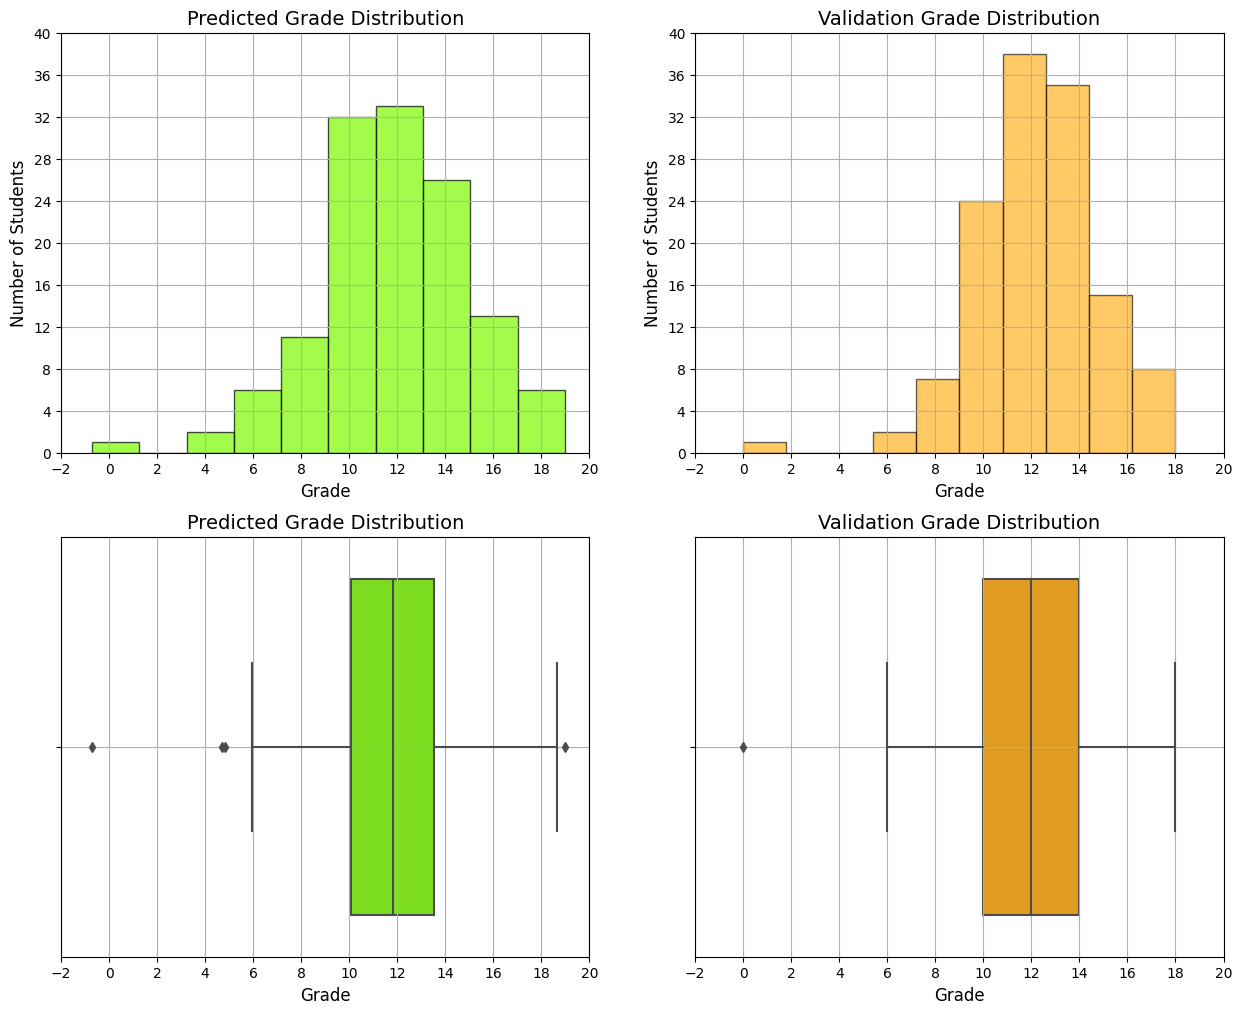

In [33]:
# Display LR prediction and validation results
# Parameters: model, colour, alpha, x_range, y_range
lr_dist = plot_dist(lr_pred, 'lawngreen', 0.7, np.arange(-2, 22, 2), 
                    np.arange(0, 44, 4))

# Show subplot
plt.show()

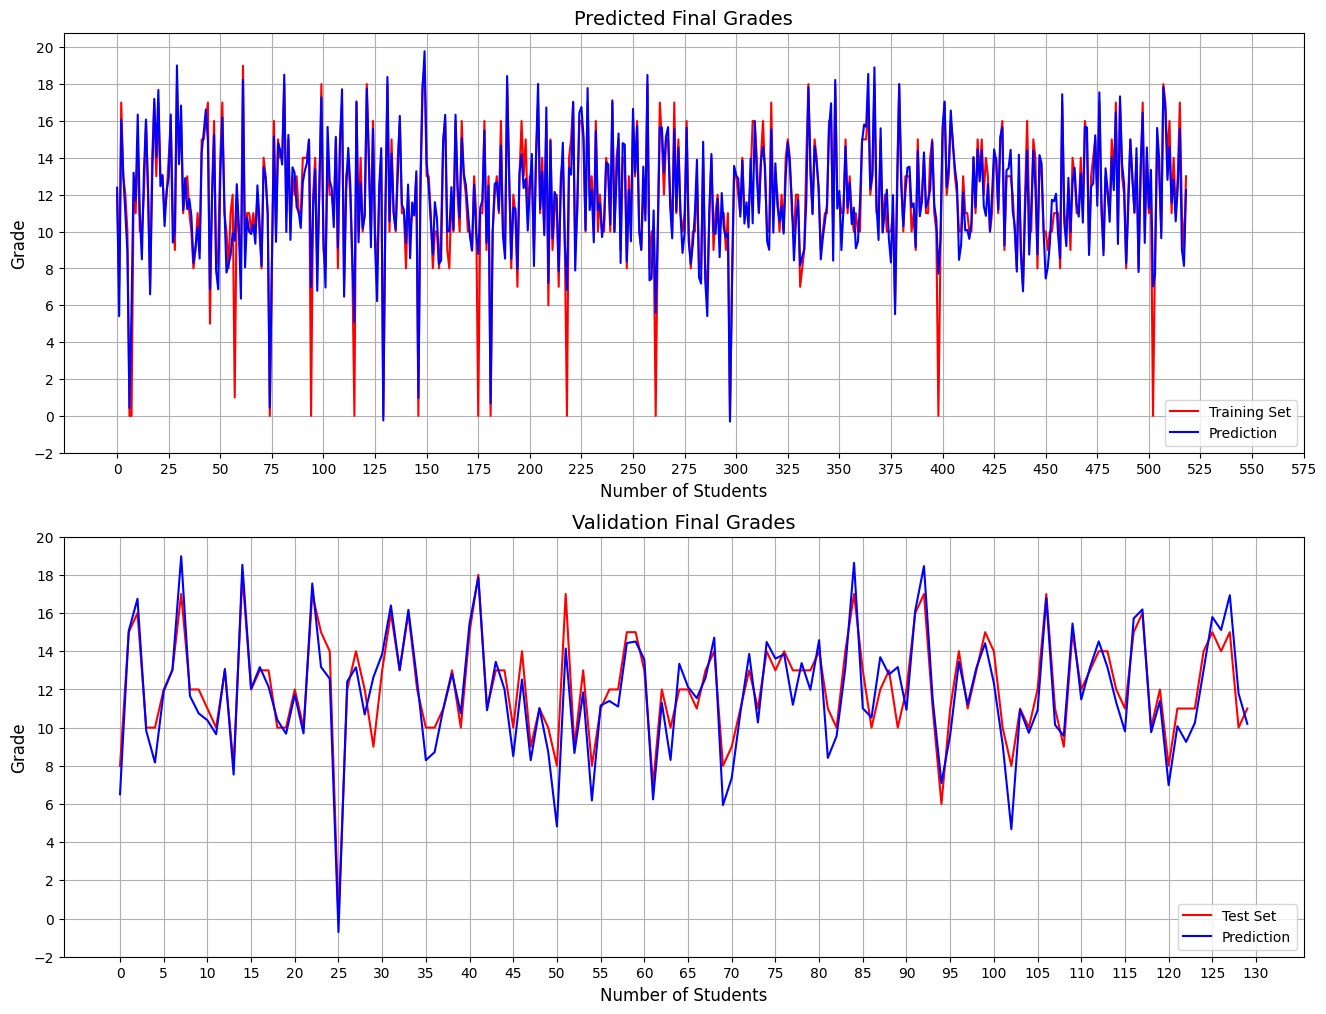

In [34]:
# Display LR training and test set trend results
# model, pred, y_range, train_window, test_window, train_legend_loc, test_legend_loc
lr_results = pred_results(lr_reg, lr_pred, np.arange(-2, 22, 2), 75, 5, 
                          "lower right", "lower right")

# Show subplot
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 1 --

R^2 Scoring:
Mean: 0.826177
Std: +/- 0.030063
Min: 0.770537
Max: 0.867234

RMSE Scoring:
Mean: 1.392709
Std: +/- 0.123960
Min: 1.210498
Max: 1.619627


-- Fold: 2 --

R^2 Scoring:
Mean: 0.823983
Std: +/- 0.031289
Min: 0.768562
Max: 0.872144

RMSE Scoring:
Mean: 1.400071
Std: +/- 0.119009
Min: 1.209492
Max: 1.588755


-- Fold: 3 --

R^2 Scoring:
Mean: 0.826043
Std: +/- 0.046287
Min: 0.734559
Max: 0.881189

RMSE Scoring:
Mean: 1.385218
Std: +/- 0.187763
Min: 1.117102
Max: 1.719244



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 4 --

R^2 Scoring:
Mean: 0.829279
Std: +/- 0.034655
Min: 0.775353
Max: 0.887788

RMSE Scoring:
Mean: 1.377938
Std: +/- 0.153307
Min: 1.113353
Max: 1.625289


-- Fold: 5 --

R^2 Scoring:
Mean: 0.831000
Std: +/- 0.061069
Min: 0.716445
Max: 0.941974

RMSE Scoring:
Mean: 1.354857
Std: +/- 0.266837
Min: 0.789646
Max: 1.809290



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 6 --

R^2 Scoring:
Mean: 0.830868
Std: +/- 0.065597
Min: 0.640139
Max: 0.946243

RMSE Scoring:
Mean: 1.352172
Std: +/- 0.277290
Min: 0.774975
Max: 2.077618


-- Fold: 7 --

R^2 Scoring:
Mean: 0.833451
Std: +/- 0.062356
Min: 0.707300
Max: 0.950652

RMSE Scoring:
Mean: 1.341637
Std: +/- 0.299386
Min: 0.748839
Max: 1.918976



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 8 --

R^2 Scoring:
Mean: 0.833542
Std: +/- 0.064722
Min: 0.702054
Max: 0.947419

RMSE Scoring:
Mean: 1.340389
Std: +/- 0.301980
Min: 0.801793
Max: 2.001802



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklear


-- Fold: 9 --

R^2 Scoring:
Mean: 0.838431
Std: +/- 0.066380
Min: 0.688968
Max: 0.945377

RMSE Scoring:
Mean: 1.321746
Std: +/- 0.355901
Min: 0.710123
Max: 2.164442



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(



-- Fold: 10 --

R^2 Scoring:
Mean: 0.833946
Std: +/- 0.066055
Min: 0.720327
Max: 0.949906

RMSE Scoring:
Mean: 1.334244
Std: +/- 0.301829
Min: 0.732412
Max: 1.843822



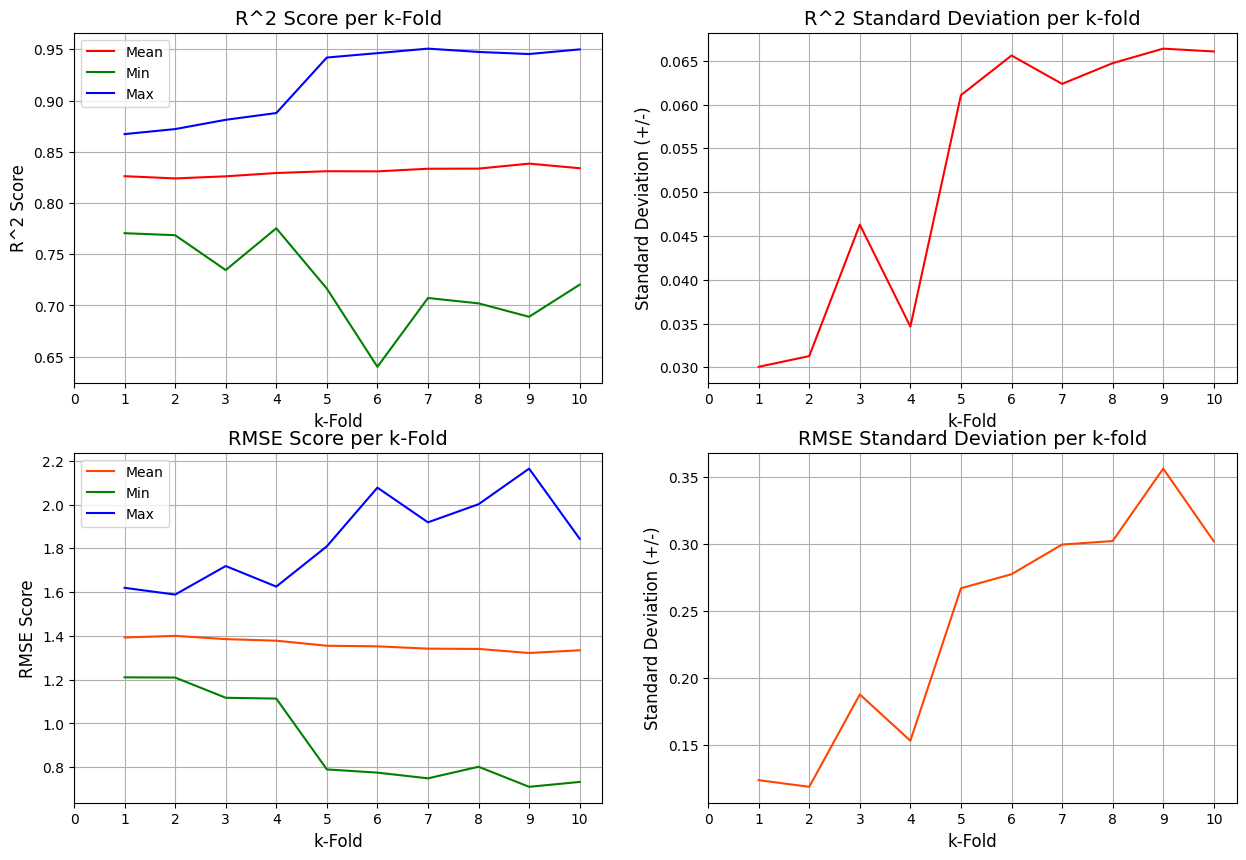

In [35]:
# Linear Regression - k-Fold Cross Validation
lr_cv = k_fold(lr_reg, 10)

<table border = "1">
  <thead>
    <th colspan = "3">Linear Regression Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.834</td>
      <td>1.334</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.066</td>
      <td>0.302</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.720</td>
      <td>0.732</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.950</td>
      <td>1.844</td>
    </tr>
  </tbody>
</table>

### Linear Support Vector Regression (SVR)

In [36]:
# Define Linear SVR model
# linear_svr = SVR()
linear_svr = SVR(kernel='linear', C=0.99, epsilon=0.098)

# Train Linear SVR model
linear_svr.fit(X_train, y_train)

SVR(C=0.99, epsilon=0.098, kernel='linear')

In [37]:
# Predict test set results
linear_svr_pred = linear_svr.predict(X_test)
# np.set_printoptions(precision = 2)
# print(np.concatenate((linear_svr_pred.reshape(len(linear_svr_pred), 1), 
#                       y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Summarize results
summarize_results(linear_svr_pred)

MAE: 0.736
MSE: 0.982
RMSE: 0.991
R^2 Score: 0.862


<table border = "1">
  <thead>
    <th colspan = "5">Linear SVR Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.736</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>0.982</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>0.991</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.862</td>
    </tr>
  </tbody>
</table>

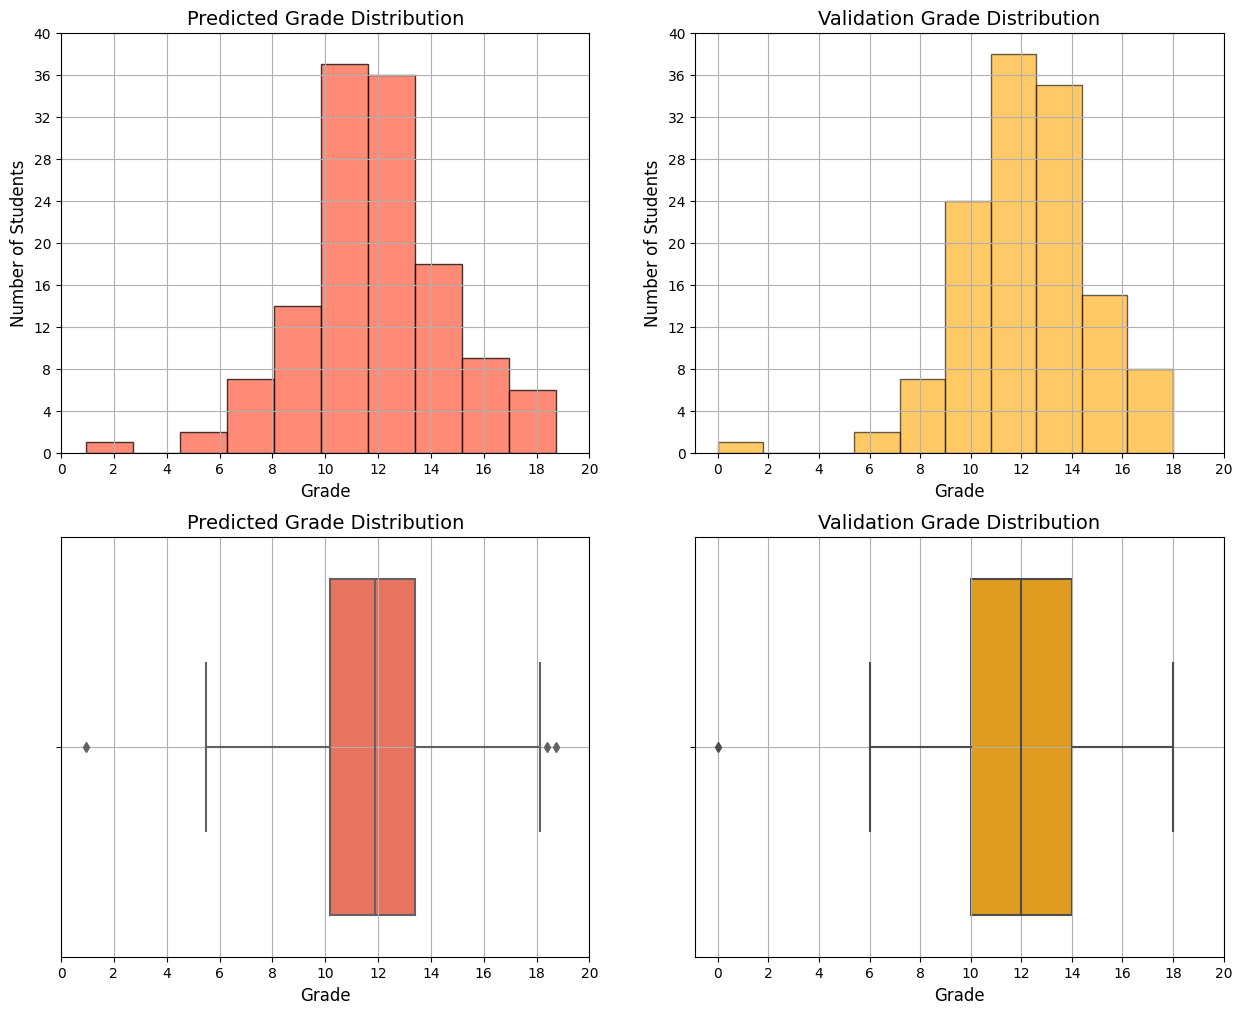

In [38]:
# Display Linear SVR prediction and validation results
# Parameters: model, colour, alpha, x_range, y_range
lsvr_dist = plot_dist(linear_svr_pred, 'tomato', 0.75, np.arange(0, 22, 2), 
                    np.arange(0, 44, 4))

# Show subplot
plt.show()

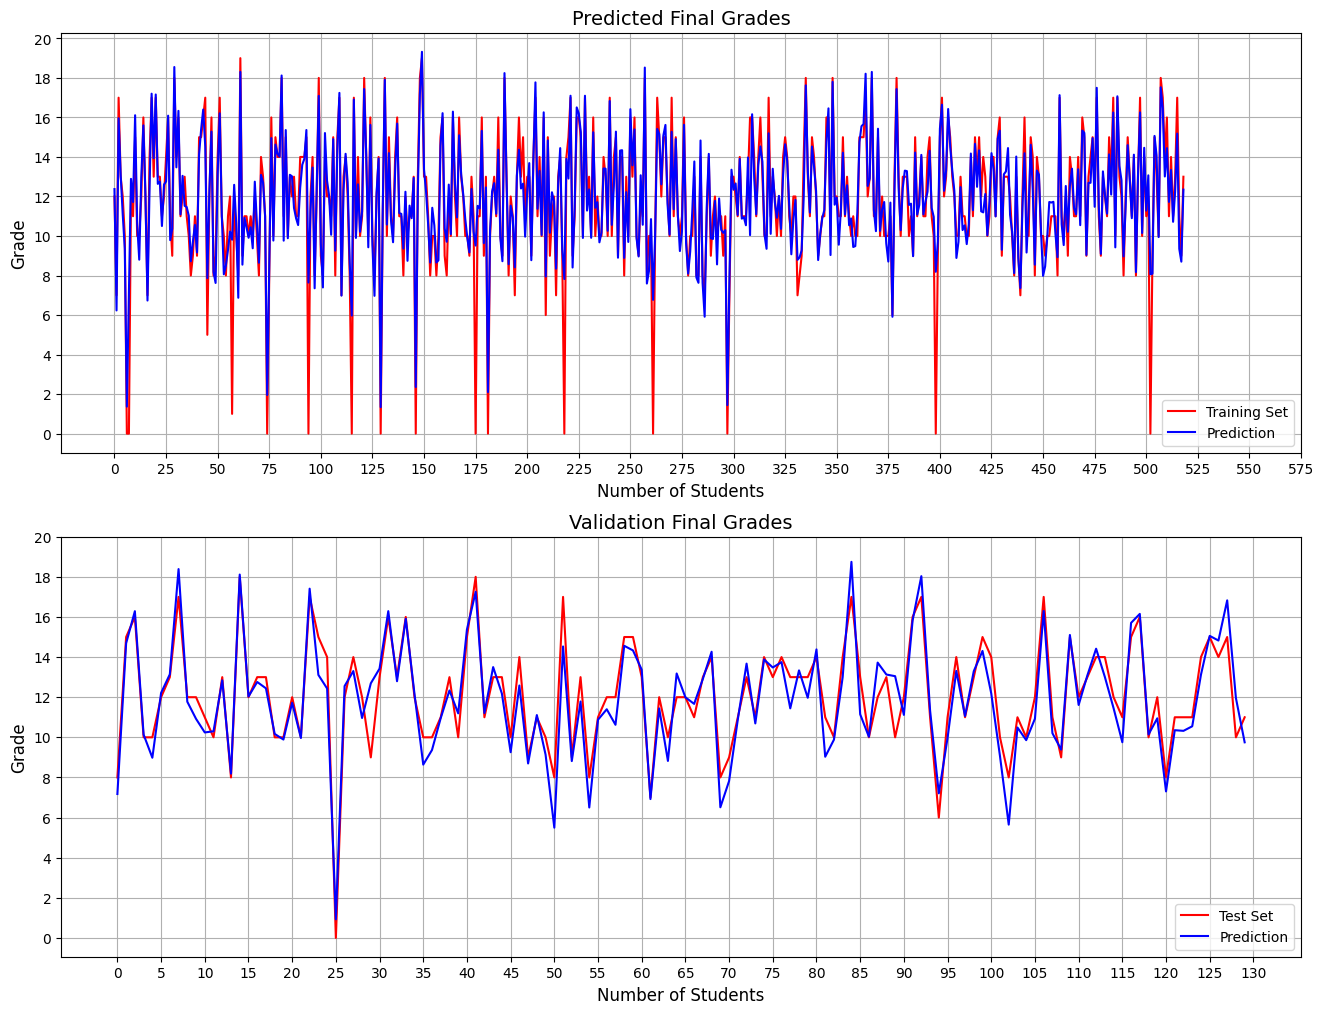

In [39]:
# Display Linear SVR training and test set trend results
# model, pred, y_range, train_window, test_window, train_legend_loc, test_legend_loc
lsvr_results = pred_results(linear_svr, linear_svr_pred, np.arange(0, 22, 2), 75, 
                            5, "lower right", "lower right")

# Show subplot
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 1 --

R^2 Scoring:
Mean: 0.828596
Std: +/- 0.031073
Min: 0.773951
Max: 0.879047

RMSE Scoring:
Mean: 1.382328
Std: +/- 0.131949
Min: 1.155393
Max: 1.607532



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 2 --

R^2 Scoring:
Mean: 0.829015
Std: +/- 0.031209
Min: 0.788454
Max: 0.878108

RMSE Scoring:
Mean: 1.379550
Std: +/- 0.122744
Min: 1.180947
Max: 1.518945



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 3 --

R^2 Scoring:
Mean: 0.829426
Std: +/- 0.044440
Min: 0.751021
Max: 0.895384

RMSE Scoring:
Mean: 1.372417
Std: +/- 0.186813
Min: 1.048244
Max: 1.675669



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 4 --

R^2 Scoring:
Mean: 0.831713
Std: +/- 0.034883
Min: 0.777915
Max: 0.884849

RMSE Scoring:
Mean: 1.367735
Std: +/- 0.155462
Min: 1.127838
Max: 1.603101



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 5 --

R^2 Scoring:
Mean: 0.830333
Std: +/- 0.056642
Min: 0.730271
Max: 0.937133

RMSE Scoring:
Mean: 1.361171
Std: +/- 0.253621
Min: 0.821929
Max: 1.772979



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 6 --

R^2 Scoring:
Mean: 0.832761
Std: +/- 0.061847
Min: 0.665835
Max: 0.938139

RMSE Scoring:
Mean: 1.346429
Std: +/- 0.263720
Min: 0.840299
Max: 2.002066



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 7 --

R^2 Scoring:
Mean: 0.833855
Std: +/- 0.063240
Min: 0.708719
Max: 0.943439

RMSE Scoring:
Mean: 1.340548
Std: +/- 0.305498
Min: 0.801695
Max: 1.932051



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 8 --

R^2 Scoring:
Mean: 0.834142
Std: +/- 0.064812
Min: 0.699430
Max: 0.943448

RMSE Scoring:
Mean: 1.338828
Std: +/- 0.309694
Min: 0.748479
Max: 2.010597



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklear


-- Fold: 9 --

R^2 Scoring:
Mean: 0.837601
Std: +/- 0.068353
Min: 0.686055
Max: 0.946972

RMSE Scoring:
Mean: 1.324183
Std: +/- 0.370085
Min: 0.710393
Max: 2.174554



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklear


-- Fold: 10 --

R^2 Scoring:
Mean: 0.832320
Std: +/- 0.067473
Min: 0.714101
Max: 0.942754

RMSE Scoring:
Mean: 1.340008
Std: +/- 0.314409
Min: 0.782946
Max: 1.854451



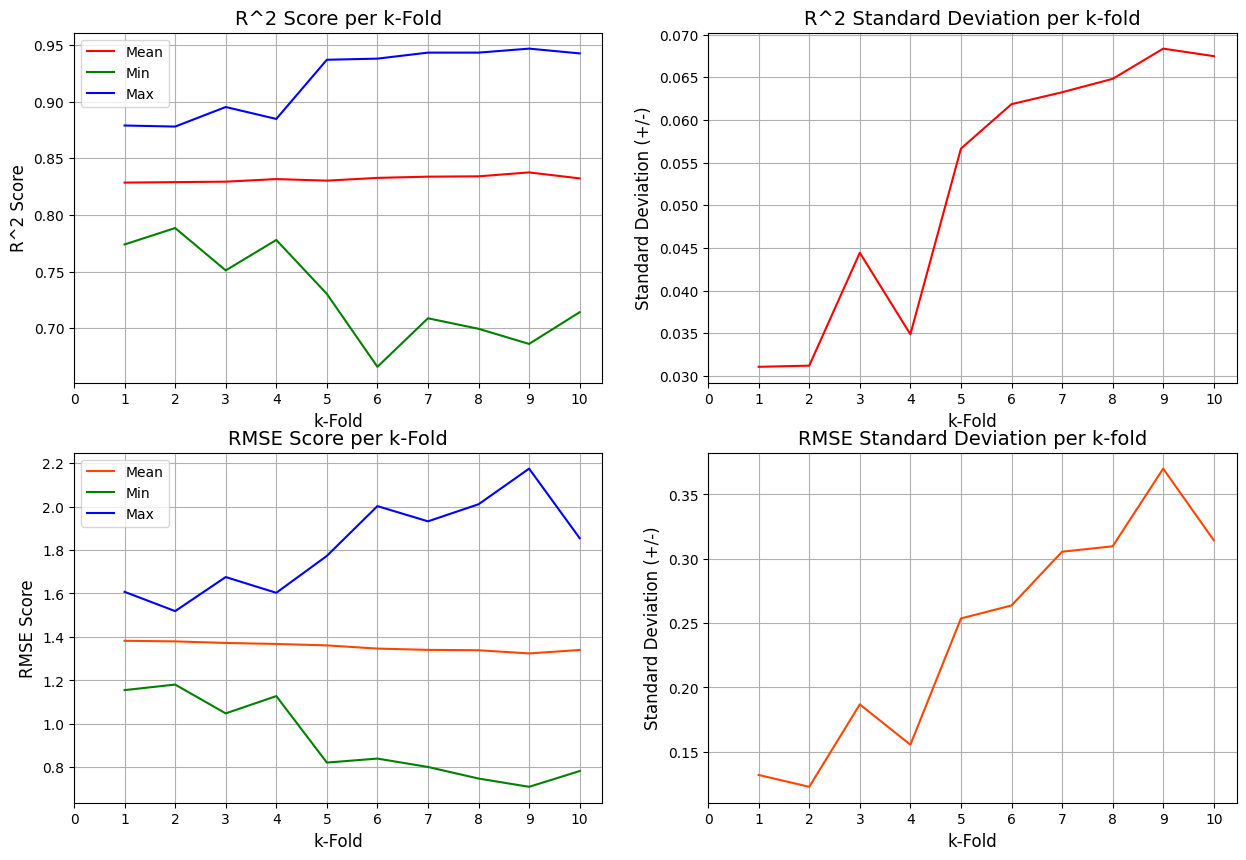

In [40]:
# Linear SVR - k-Fold Cross Validation
lsvr_cv = k_fold(linear_svr, 10)

<table border = "1">
  <thead>
    <th colspan = "3">Linear SVR Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr><tr>
      <td><b>Mean</b></td>
      <td>0.832</td>
      <td>1.340</td>
    <tr>
      <td><b>Std.</b></td>
      <td>0.068</td>
      <td>0.314</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.714</td>
      <td>0.783</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.943</td>
      <td>1.855</td>
    </tr>
  </tbody>
</table>

In [41]:
# Apply Grid Search for parameter tuning

# linear_svr_params = {'C': [0.25, 0.275, 0.3, 0.4, 0.5, 0.6, 0.75, 0.8, 0.9, 1], 
#                      'kernel': ['linear'],
#                      'epsilon': [0.025, 0.05, 0.075, 0.1]}

linear_svr_params = {'C': [0.99],
                     'epsilon': [0.098],
                     'kernel': ['linear']}

# Perform Grid Search
if ((metric == "r2") or (metric == "rmse")):
  # R^2 Score
  lsvr_grid_r2 = GridSearchCV(linear_svr, linear_svr_params, scoring='r2', 
                              cv=lsvr_cv, n_jobs=-1)
  results_r2 = lsvr_grid_r2.fit(X_train, y_train)
  # RMSE
  lsvr_grid_rmse = GridSearchCV(linear_svr, linear_svr_params, 
                                scoring='neg_root_mean_squared_error', 
                                cv=lsvr_cv, n_jobs=-1)
  results_rmse = lsvr_grid_rmse.fit(X_train, y_train)

  # Summarize results
  best_r2 = lsvr_grid_r2.best_score_
  best_rmse = np.abs(lsvr_grid_rmse.best_score_)
  # Best scores
  print("Best R^2 Score: %.3f%%" % (best_r2 * 100))
  print("Best RMSE: %.3f" % (best_rmse))

  # Best parameters
  if (metric == "r2"):
    # R^2 Score
    best_parameters = lsvr_grid_r2.best_params_
    print("Best Parameters (R^2): ", best_parameters)
  elif (metric == "rmse"):
    # RMSE
    best_parameters = lsvr_grid_rmse.best_params_
    print("Best Parameters (RMSE): ", best_parameters)
else:
  # Invalid metric
  print("Invalid scoring metric!")

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklear

Best R^2 Score: 83.232%
Best RMSE: 1.340
Best Parameters (R^2):  {'C': 0.99, 'epsilon': 0.098, 'kernel': 'linear'}


<table border = "1">
  <thead>
    <th colspan = "2">Linear SVR Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td colspan = "2"><b>Best Score:</b></td>
    </tr>
    <tr>
      <td><b>R^2</b></td>
      <td>83.232%</td>
    </tr>
    <tr>
      <td><b>RMSE</b></td>
      <td>1.340</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>C</b></td>
      <td>0.99</td>
    </tr>
    <tr>
      <td><b>epsilon<b></td>
      <td>0.098</td>
    </tr>
    <tr>
      <td><b>kernel</b></td>
      <td>'linear'</td>
    </tr>
  </tbody>
</table>

### Decision Tree (DT)

In [42]:
# Define DT model
# dt_reg = DecisionTreeRegressor(criterion='squared_error', random_state=0)
dt_reg = DecisionTreeRegressor(criterion='squared_error', max_depth=4, min_samples_leaf=9,
                               min_samples_split=2, random_state=0)

# Train DT model
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=9, random_state=0)

In [43]:
# Predict test set results
dt_pred = dt_reg.predict(X_test)
# np.set_printoptions(precision = 2)
# print(np.concatenate((dt_pred.reshape(len(dt_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Summarize results
summarize_results(dt_pred)

MAE: 0.744
MSE: 1.183
RMSE: 1.088
R^2 Score: 0.833


<table border = "1">
  <thead>
    <th colspan = "2">Decision Tree Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.744</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>1.183</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>1.088</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.833</td>
    </tr>
  </tbody>
</table>

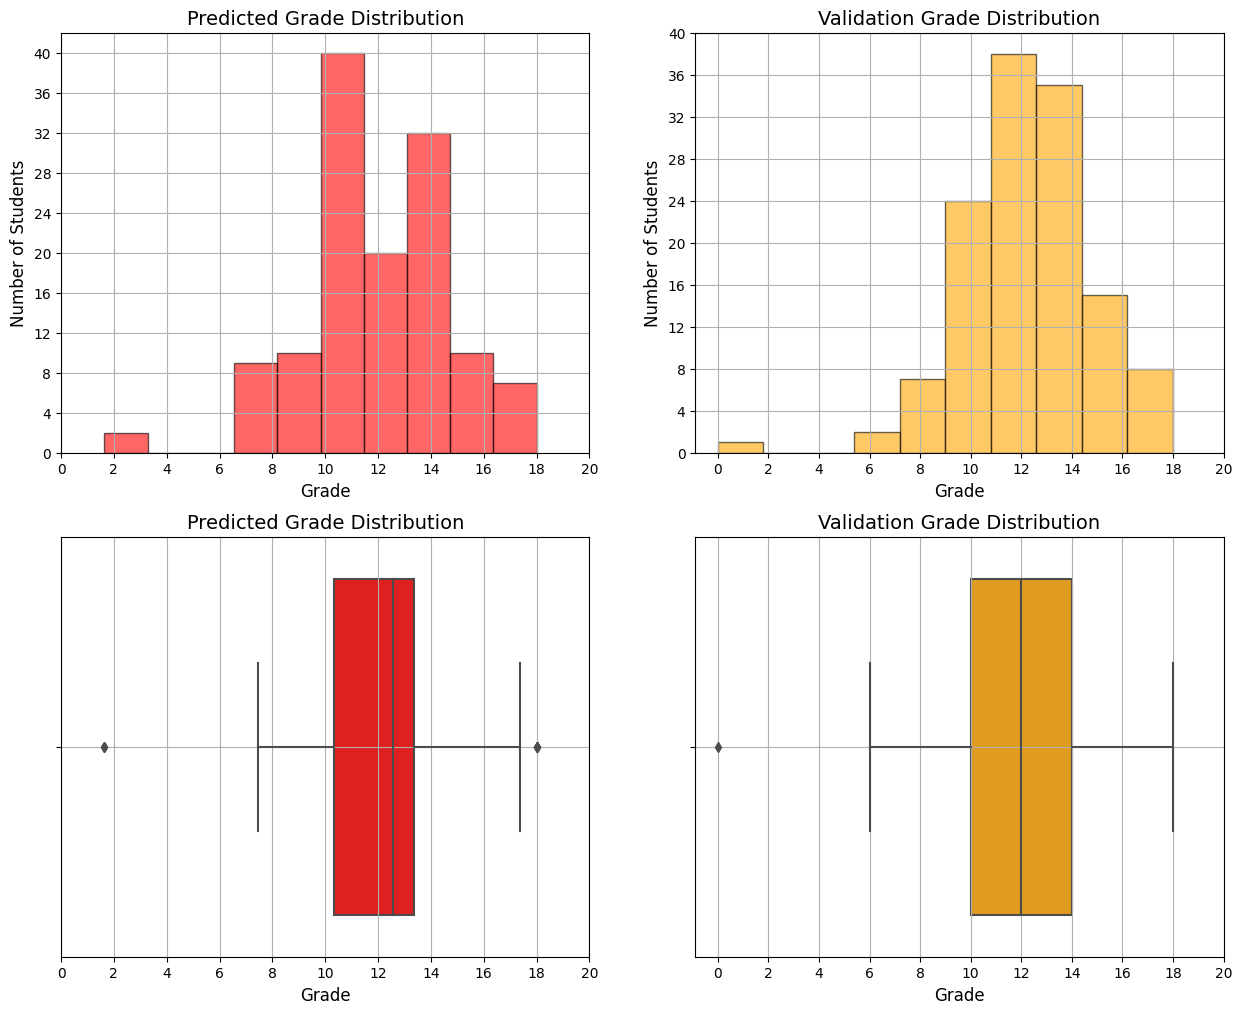

In [44]:
# Display DT prediction and validation results
# Parameters: model, colour, alpha, x_range, y_range
dt_dist = plot_dist(dt_pred, 'red', 0.6, np.arange(0, 22, 2), np.arange(0, 44, 4))

# Show subplot
plt.show()

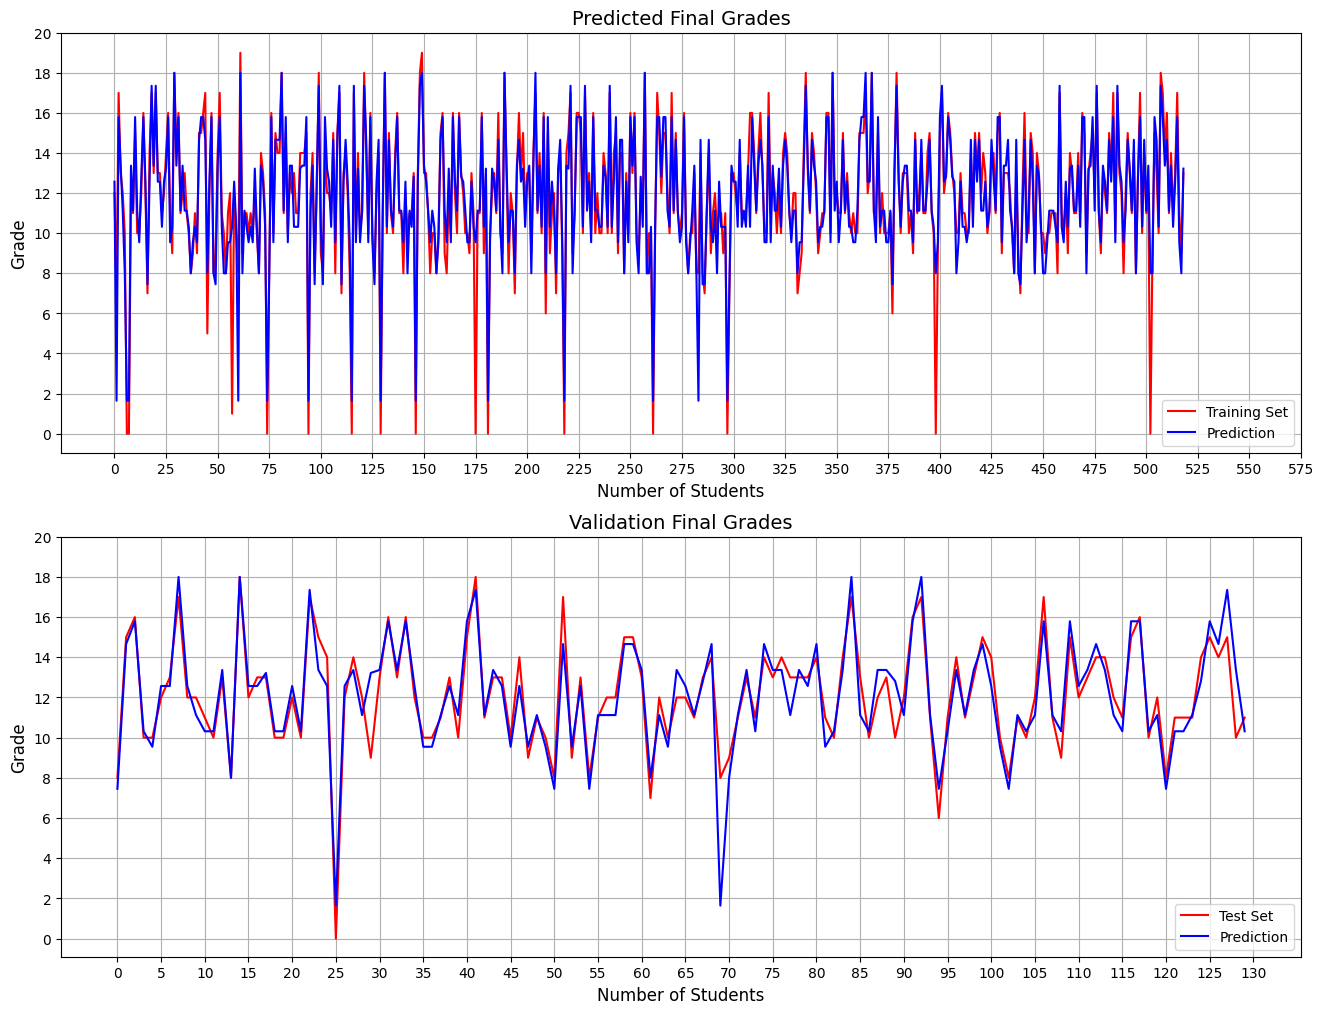

In [45]:
# Display DT training and test set trend results
# model, pred, y_range, train_window, test_window, train_legend_loc, test_legend_loc
dt_results = pred_results(dt_reg, dt_pred, np.arange(0, 22, 2), 75, 5, 
                          "lower right", "lower right")

# Show subplot
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 1 --

R^2 Scoring:
Mean: 0.804260
Std: +/- 0.023171
Min: 0.773728
Max: 0.839208

RMSE Scoring:
Mean: 1.480768
Std: +/- 0.097400
Min: 1.332153
Max: 1.608325


-- Fold: 2 --

R^2 Scoring:
Mean: 0.805787
Std: +/- 0.027374
Min: 0.762300
Max: 0.859270

RMSE Scoring:
Mean: 1.472691
Std: +/- 0.099828
Min: 1.264200
Max: 1.610106


-- Fold: 3 --

R^2 Scoring:
Mean: 0.797682
Std: +/- 0.055708
Min: 0.706607
Max: 0.883605

RMSE Scoring:
Mean: 1.491254
Std: +/- 0.209798
Min: 1.167309
Max: 1.838735



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 4 --

R^2 Scoring:
Mean: 0.801018
Std: +/- 0.066248
Min: 0.677962
Max: 0.922825

RMSE Scoring:
Mean: 1.473419
Std: +/- 0.260625
Min: 0.934782
Max: 1.887785


-- Fold: 5 --

R^2 Scoring:
Mean: 0.809473
Std: +/- 0.078722
Min: 0.619018
Max: 0.901037

RMSE Scoring:
Mean: 1.436707
Std: +/- 0.302250
Min: 1.087568
Max: 2.097210



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 6 --

R^2 Scoring:
Mean: 0.808613
Std: +/- 0.080500
Min: 0.632476
Max: 0.924941

RMSE Scoring:
Mean: 1.433530
Std: +/- 0.319411
Min: 0.915739
Max: 1.975591


-- Fold: 7 --

R^2 Scoring:
Mean: 0.827080
Std: +/- 0.081637
Min: 0.581817
Max: 0.946325

RMSE Scoring:
Mean: 1.353964
Std: +/- 0.354314
Min: 0.804092
Max: 2.324993



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 8 --

R^2 Scoring:
Mean: 0.825814
Std: +/- 0.086838
Min: 0.618966
Max: 0.939037

RMSE Scoring:
Mean: 1.357598
Std: +/- 0.381298
Min: 0.777122
Max: 2.185265


-- Fold: 9 --

R^2 Scoring:
Mean: 0.830786
Std: +/- 0.086681
Min: 0.589549
Max: 0.929158

RMSE Scoring:
Mean: 1.342586
Std: +/- 0.401245
Min: 0.808708
Max: 2.486416



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklear


-- Fold: 10 --

R^2 Scoring:
Mean: 0.838707
Std: +/- 0.092875
Min: 0.664683
Max: 0.956773

RMSE Scoring:
Mean: 1.287665
Std: +/- 0.414210
Min: 0.747239
Max: 1.958928



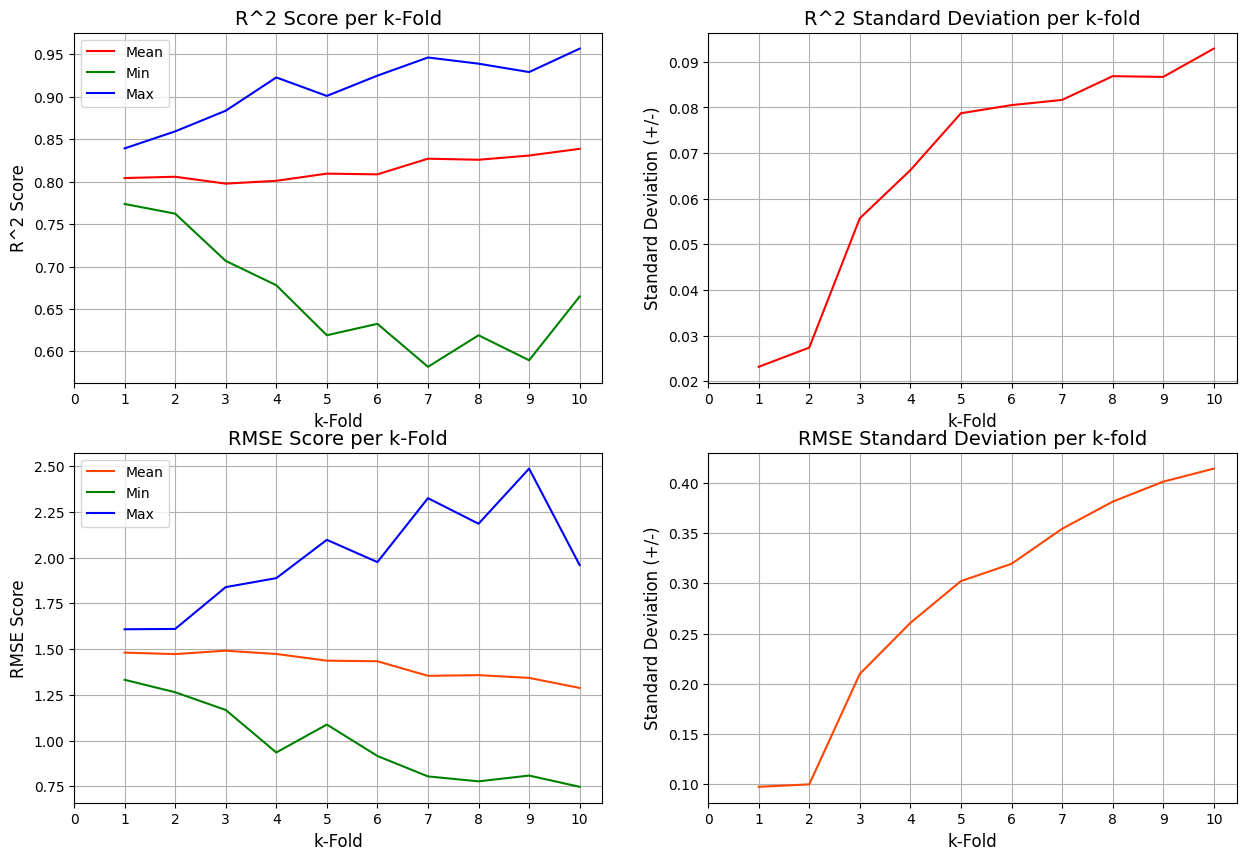

In [46]:
# Decision Tree - k-Fold Cross Validation
dt_cv = k_fold(dt_reg, 10)

<table border = "1">
  <thead>
    <th colspan = "3">Decision Tree Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.839</td>
      <td>1.288</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.093</td>
      <td>0.414</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.665</td>
      <td>0.747</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.957</td>
      <td>1.959</td>
    </tr>
  </tbody>
</table>

In [47]:
# Apply Grid Search for parameter tuning

# dt_params = {'criterion': ['squared_error', 'squared_error'],
#              'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
#              'min_samples_leaf': [2, 5, 8, 10],
#              'min_samples_split': [2, 5, 8, 10],
#              'random_state': [0]}

dt_params = {'criterion': ['squared_error'],
            'max_depth': [4],
            'min_samples_leaf': [9],
            'min_samples_split': [2],
            'random_state': [0]}

# Perform Grid Search
if ((metric == "r2") or (metric == "rmse")):
  # R^2 Score
  dt_grid_r2 = GridSearchCV(dt_reg, dt_params, scoring='r2', 
                              cv=dt_cv, n_jobs=-1)
  results_r2 = dt_grid_r2.fit(X_train, y_train)
  # RMSE
  dt_grid_rmse = GridSearchCV(dt_reg, dt_params, 
                                scoring='neg_root_mean_squared_error', 
                                cv=dt_cv, n_jobs=-1)
  results_rmse = dt_grid_rmse.fit(X_train, y_train)

  # Summarize results
  best_r2 = dt_grid_r2.best_score_
  best_rmse = np.abs(dt_grid_rmse.best_score_)
  # Best scores
  print("Best R^2 Score: %.3f%%" % (best_r2 * 100))
  print("Best RMSE: %.3f" % (best_rmse))

  # Best parameters
  if (metric == "r2"):
    # R^2 Score
    best_parameters = dt_grid_r2.best_params_
    print("Best Parameters (R^2): ", best_parameters)
  elif (metric == "rmse"):
    # RMSE
    best_parameters = dt_grid_rmse.best_params_
    print("Best Parameters (RMSE): ", best_parameters)
else:
  # Invalid metric
  print("Invalid scoring metric!")

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklear

Best R^2 Score: 83.871%
Best RMSE: 1.288
Best Parameters (R^2):  {'criterion': 'squared_error', 'max_depth': 4, 'min_samples_leaf': 9, 'min_samples_split': 2, 'random_state': 0}


<table border = "1">
  <thead>
    <th colspan = "2">Decision Tree Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td colspan = "2"><b>Best Score:</b></td>
    </tr>
    <tr>
      <td><b>R^2</b></td>
      <td>83.871%</td>
    </tr>
    <tr>
      <td><b>RMSE</b></td>
      <td>1.288</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>criterion</b></td>
      <td>'squared_error'</td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>4</td>
    </tr>
    <tr>
      <td><b>min_samples_leaf</b></td>
      <td>9</td>
    </tr>
    <tr>
      <td><b>min_samples_split</b></td>
      <td>2</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>0</td>
    </tr>
  </tbody>
</table>

### Random Forest (RF)

In [48]:
# Define RF model
# rf_reg = RandomForestRegressor(criterion='squared_error', random_state=0)
rf_reg = RandomForestRegressor(criterion='squared_error', max_depth=4, 
                               n_estimators=186, min_samples_leaf=2, 
                               min_samples_split=9, random_state=0)

# rf_reg = RandomForestRegressor(criterion='squared_error', max_depth=4, min_samples_split=2,
#                             min_samples_leaf=3, n_estimators=53, random_state=0)

# Train RF model
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=9,
                      n_estimators=186, random_state=0)

In [49]:
# Predict test set results
rf_pred = rf_reg.predict(X_test)
# np.set_printoptions(precision = 2)
# print(np.concatenate((rf_pred.reshape(len(rf_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Summarize results
summarize_results(rf_pred)

MAE: 0.761
MSE: 1.205
RMSE: 1.098
R^2 Score: 0.830


<table border = "1">
  <thead>
    <th colspan = "2">Random Forest Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.761</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>1.205</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>1.098</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.830</td>
    </tr>
  </tbody>
</table>

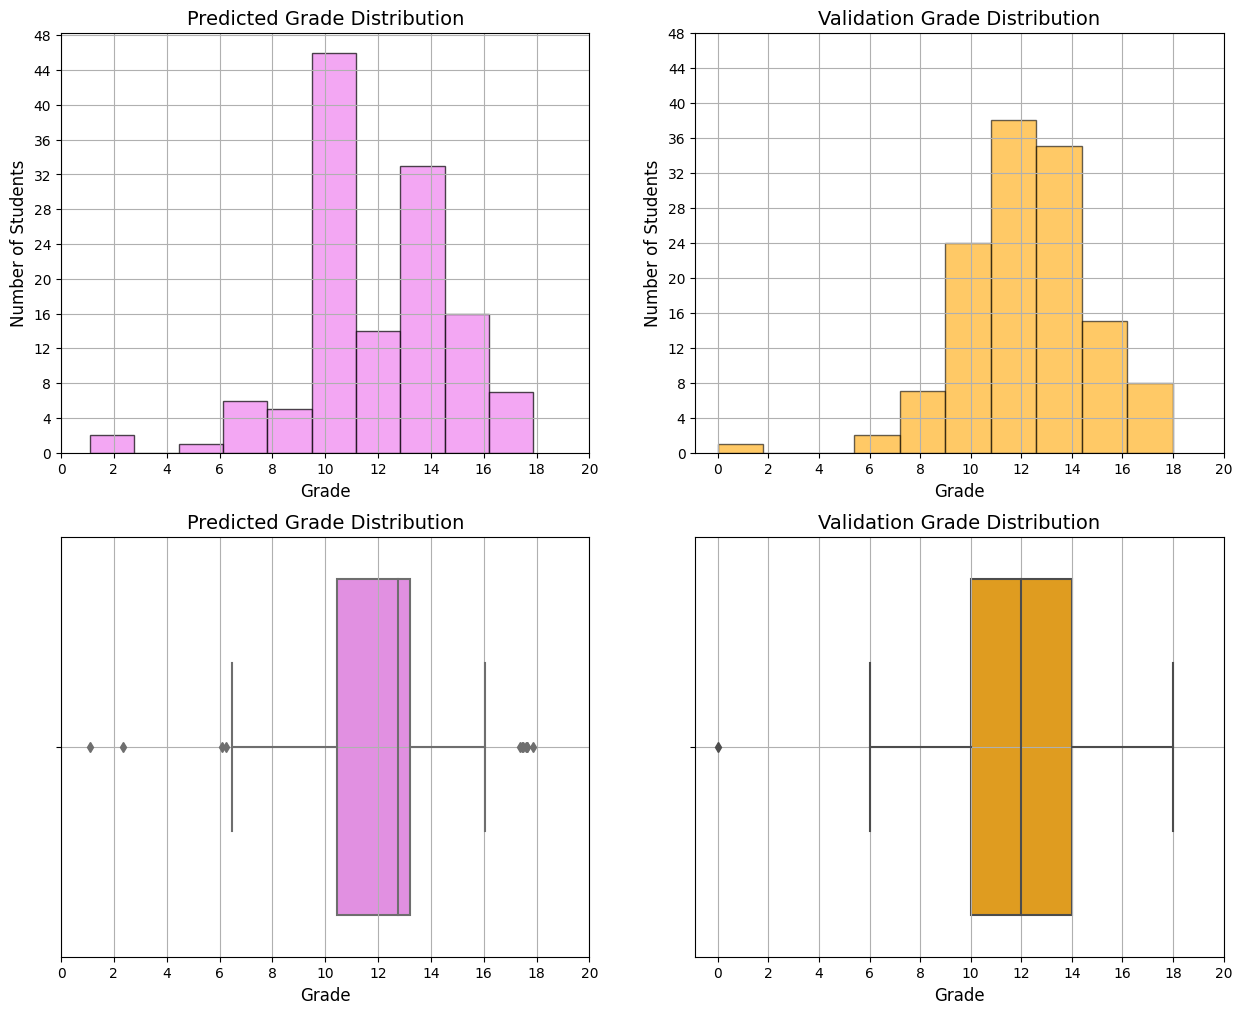

In [50]:
# Display RF prediction and validation results
# Parameters: model, colour, alpha, x_range, y_range
rf_dist = plot_dist(rf_pred, 'violet', 0.7, np.arange(0, 22, 2), np.arange(0, 52, 4))

# Show subplot
plt.show()

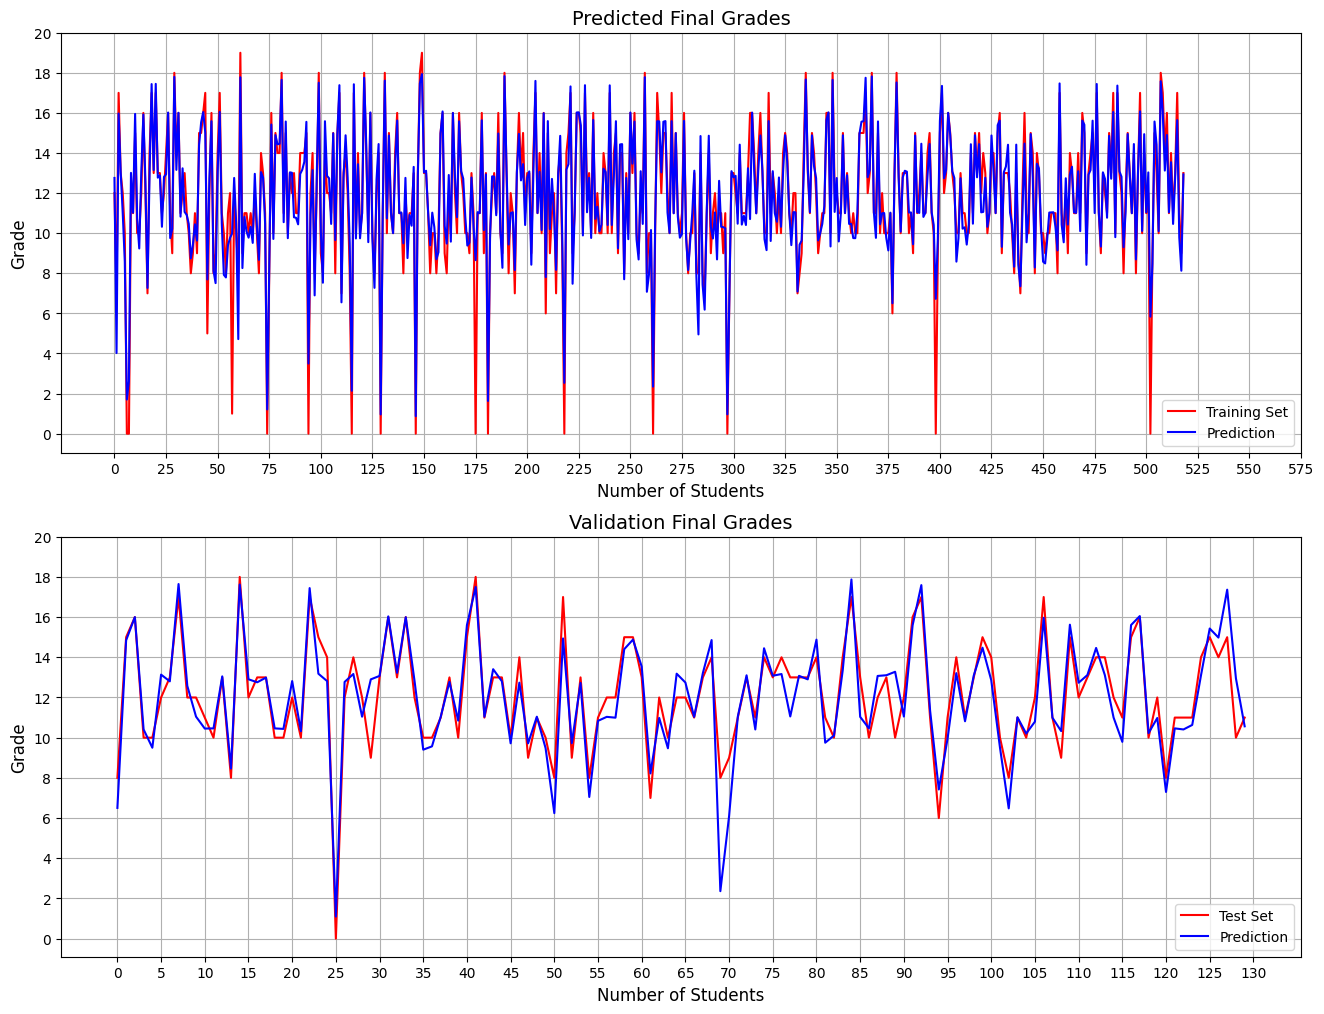

In [51]:
# Display RF training and test set trend results
# model, pred, y_range, train_window, test_window, train_legend_loc, test_legend_loc
rf_results = pred_results(rf_reg, rf_pred, np.arange(0, 22, 2), 75, 5, 
                          "lower right", "lower right")

# Show subplot
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 1 --

R^2 Scoring:
Mean: 0.834276
Std: +/- 0.027295
Min: 0.785788
Max: 0.867505

RMSE Scoring:
Mean: 1.360493
Std: +/- 0.118154
Min: 1.209265
Max: 1.564880



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 2 --

R^2 Scoring:
Mean: 0.839643
Std: +/- 0.022518
Min: 0.804766
Max: 0.875030

RMSE Scoring:
Mean: 1.338269
Std: +/- 0.088894
Min: 1.195762
Max: 1.459208



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 3 --

R^2 Scoring:
Mean: 0.845529
Std: +/- 0.048720
Min: 0.749863
Max: 0.906163

RMSE Scoring:
Mean: 1.300958
Std: +/- 0.209414
Min: 1.039874
Max: 1.668946



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 4 --

R^2 Scoring:
Mean: 0.845048
Std: +/- 0.049356
Min: 0.724933
Max: 0.907035

RMSE Scoring:
Mean: 1.303922
Std: +/- 0.208984
Min: 1.013377
Max: 1.744692



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 5 --

R^2 Scoring:
Mean: 0.843754
Std: +/- 0.064694
Min: 0.713703
Max: 0.933037

RMSE Scoring:
Mean: 1.298564
Std: +/- 0.281965
Min: 0.848284
Max: 1.818019



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 6 --

R^2 Scoring:
Mean: 0.843405
Std: +/- 0.074016
Min: 0.635672
Max: 0.936633

RMSE Scoring:
Mean: 1.292991
Std: +/- 0.298867
Min: 0.841398
Max: 1.966983



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 7 --

R^2 Scoring:
Mean: 0.850220
Std: +/- 0.068303
Min: 0.642716
Max: 0.944686

RMSE Scoring:
Mean: 1.267607
Std: +/- 0.322990
Min: 0.792809
Max: 2.149045



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 8 --

R^2 Scoring:
Mean: 0.846425
Std: +/- 0.070636
Min: 0.671631
Max: 0.938707

RMSE Scoring:
Mean: 1.280168
Std: +/- 0.317218
Min: 0.788849
Max: 2.028633



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklear


-- Fold: 9 --

R^2 Scoring:
Mean: 0.851030
Std: +/- 0.068684
Min: 0.649515
Max: 0.941476

RMSE Scoring:
Mean: 1.268420
Std: +/- 0.360930
Min: 0.735043
Max: 2.297618



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklear


-- Fold: 10 --

R^2 Scoring:
Mean: 0.844648
Std: +/- 0.077310
Min: 0.708575
Max: 0.948267

RMSE Scoring:
Mean: 1.279634
Std: +/- 0.343216
Min: 0.744293
Max: 1.940201



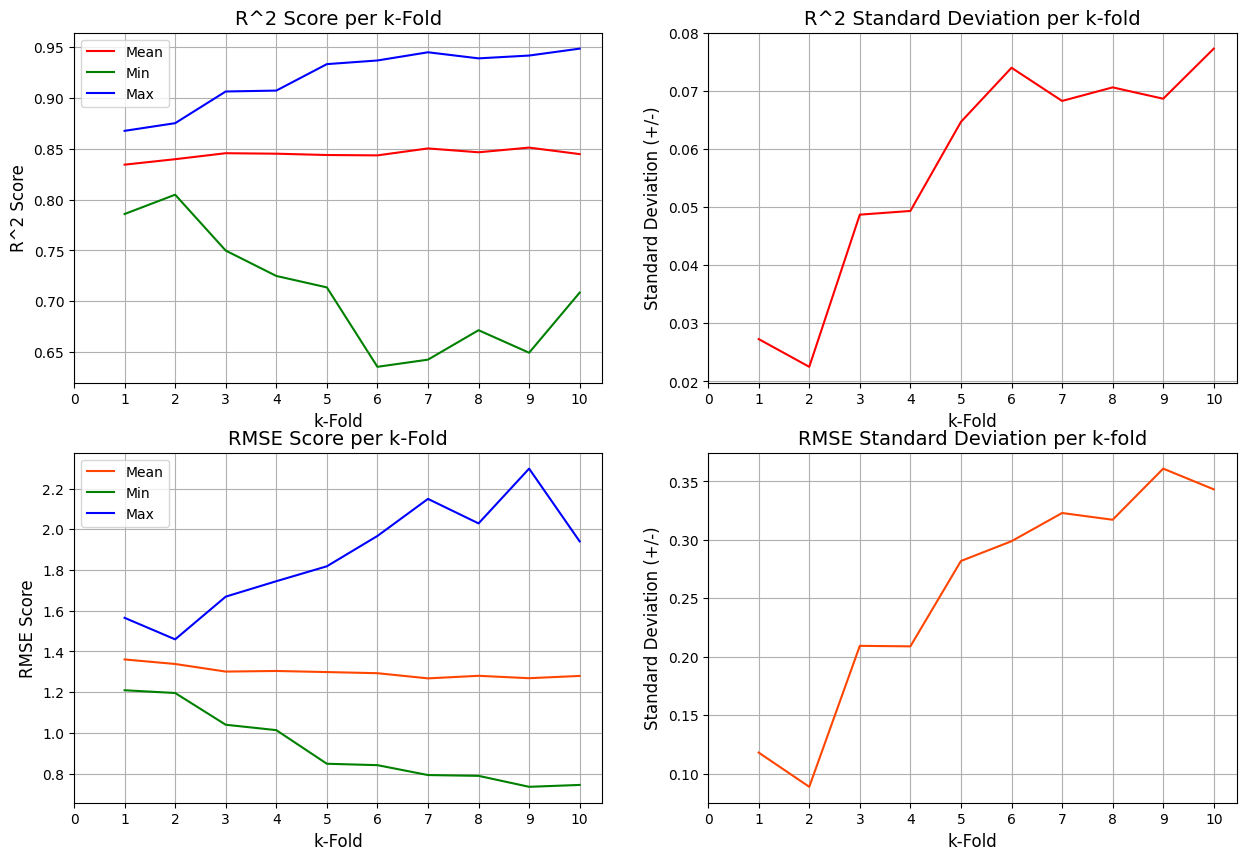

In [52]:
# Random Forest - k-Fold Cross Validation
rf_cv = k_fold(rf_reg, 10)

<table border = "1">
  <thead>
    <th colspan = "3">Random Forest Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.845</td>
      <td>1.280</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.077</td>
      <td>0.343</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.709</td>
      <td>0.744</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.948</td>
      <td>1.940</td>
    </tr>
  </tbody>
</table>

In [53]:
# Apply Grid Search for parameter tuning

# rf_params = {'n_estimators': [50, 100, 150, 200, 250],
#              'criterion': ['squared_error'],
#              'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
#              'min_samples_leaf': [2, 5, 8, 10],
#              'min_samples_leaf': [2, 5, 8, 10],
#              'n_estimators': [50, 75, 100, 125, 150, 175, 200],
#              'random_state': [0, 1, 2]}

rf_params = {'criterion': ['squared_error'],
             'max_depth': [4],
             'n_estimators': [186],
             'min_samples_leaf': [2],
             'min_samples_split': [9],
             'random_state': [0]}

# Perform Grid Search
if ((metric == "r2") or (metric == "rmse")):
  # R^2 Score
  rf_grid_r2 = GridSearchCV(rf_reg, rf_params, scoring='r2', 
                              cv=rf_cv, n_jobs=-1)
  results_r2 = rf_grid_r2.fit(X_train, y_train)
  # RMSE
  rf_grid_rmse = GridSearchCV(rf_reg, rf_params, 
                                scoring='neg_root_mean_squared_error', 
                                cv=rf_cv, n_jobs=-1)
  results_rmse = rf_grid_rmse.fit(X_train, y_train)

  # Summarize results
  best_r2 = rf_grid_r2.best_score_
  best_rmse = np.abs(rf_grid_rmse.best_score_)
  # Best scores
  print("Best R^2 Score: %.3f%%" % (best_r2 * 100))
  print("Best RMSE: %.3f" % (best_rmse))

  # Best parameters
  if (metric == "r2"):
    # R^2 Score
    best_parameters = rf_grid_r2.best_params_
    print("Best Parameters (R^2): ", best_parameters)
  elif (metric == "rmse"):
    # RMSE
    best_parameters = rf_grid_rmse.best_params_
    print("Best Parameters (RMSE): ", best_parameters)
else:
  # Invalid metric
  print("Invalid scoring metric!")

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklear

Best R^2 Score: 84.465%
Best RMSE: 1.280
Best Parameters (R^2):  {'criterion': 'squared_error', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 186, 'random_state': 0}


<table border = "1">
  <thead>
    <th colspan = "2">Random Forest Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td colspan = "2"><b>Best Score:</b></td>
    </tr>
    <tr>
      <td><b>R^2</b></td>
      <td>84.465%</td>
    </tr>
    <tr>
      <td><b>RMSE</b></td>
      <td>1.280</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>criterion</b></td>
      <td>'squared_error'</td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>4</td>
    </tr>
    <tr>
      <td><b>min_samples_leaf</b></td>
      <td>2</td>
    </tr>
    <tr>
      <td><b>min_samples_split</b></td>
      <td>9</td>
    </tr>
    <tr>
      <td><b>n_estimators</b></td>
      <td>186</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>0</td>
    </tr>
  </tbody>
</table>

### XGBoost (XGB)

In [54]:
# Define XGB model
# xgb_reg = XGBRegressor(random_state=0)
xgb_reg = XGBRegressor(max_depth=2, n_estimators=21, colsample_bytree=0.9, 
                       random_state=0)

# Train XGB model
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=21, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [55]:
# Predict test set results
xgb_pred = xgb_reg.predict(X_test)
# np.set_printoptions(precision = 2)
# print(np.concatenate((xgb_pred.reshape(len(xgb_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Summarize results
summarize_results(xgb_pred)

MAE: 0.798
MSE: 1.202
RMSE: 1.096
R^2 Score: 0.831


<table border = "1">
  <thead>
    <th colspan = "2">XGBoost Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.798</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>1.202</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>1.096</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.831</td>
    </tr>
  </tbody>
</table>

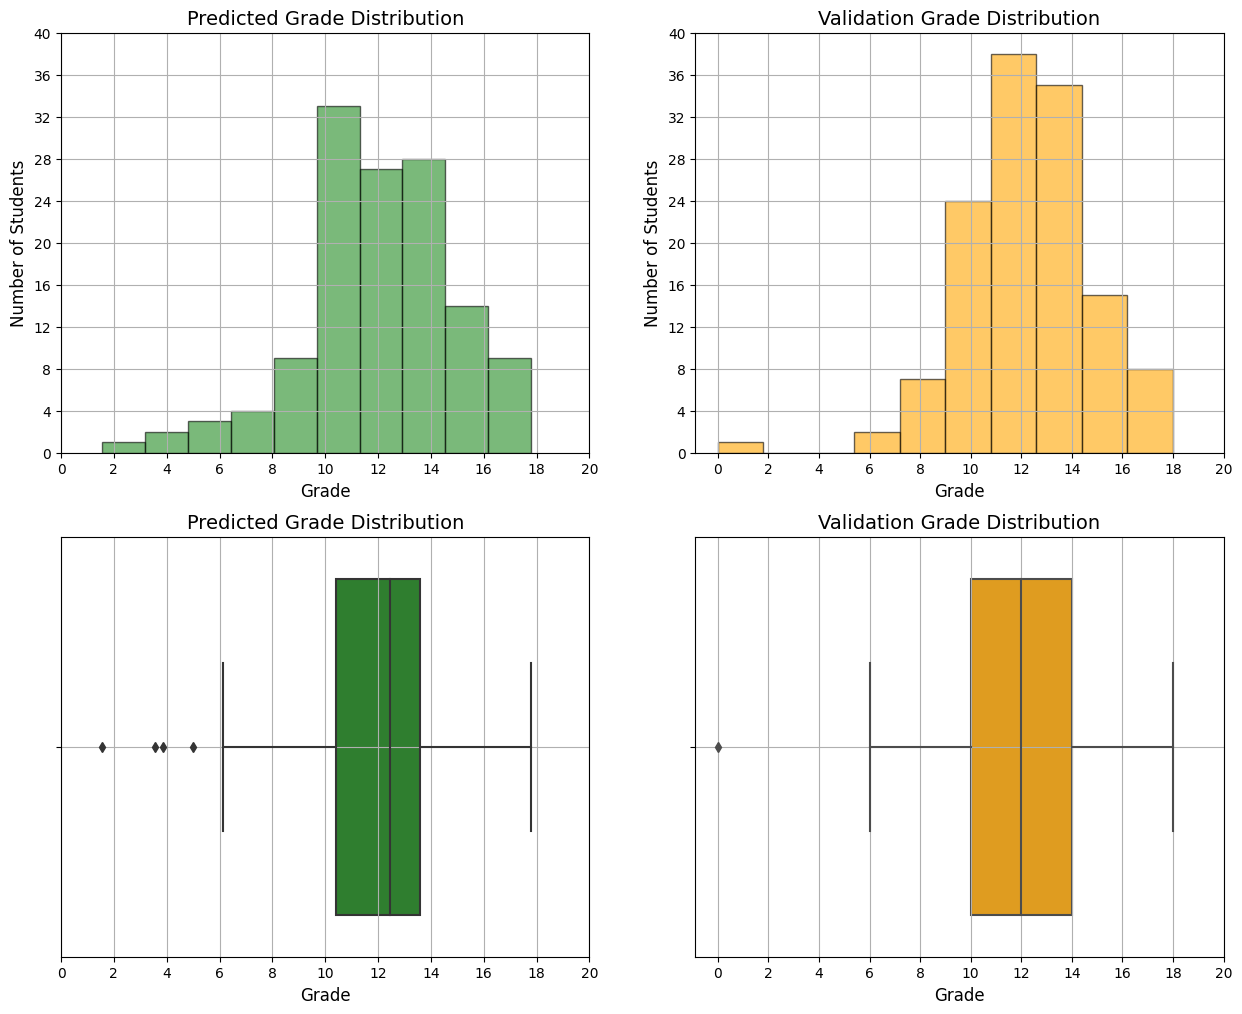

In [56]:
# Display XGB prediction and validation results
# Parameters: model, colour, alpha, x_range, y_range
xgb_dist = plot_dist(xgb_pred, 'forestgreen', 0.6, np.arange(0, 22, 2), 
                     np.arange(0, 44, 4))

# Show subplot
plt.show()

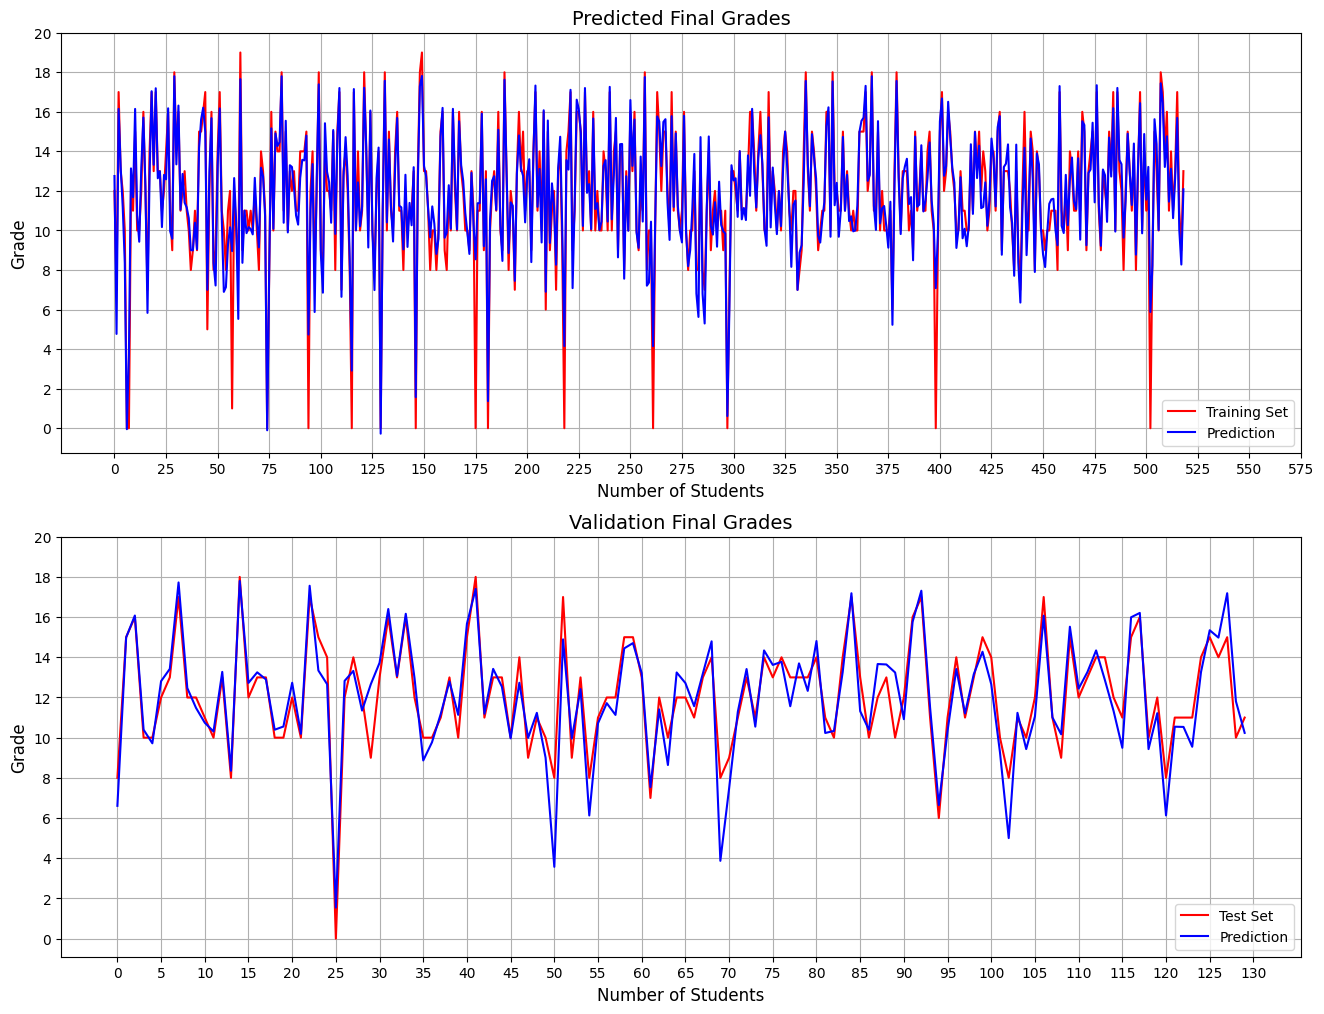

In [57]:
# Display XGB training and test set trend results
# model, pred, y_range, train_window, test_window, train_legend_loc, test_legend_loc
xgb_results = pred_results(xgb_reg, xgb_pred, np.arange(0, 22, 2), 75, 5, 
                          "lower right", "lower right")

# Show subplot
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 1 --

R^2 Scoring:
Mean: 0.824630
Std: +/- 0.021578
Min: 0.788701
Max: 0.848527

RMSE Scoring:
Mean: 1.401292
Std: +/- 0.092010
Min: 1.298881
Max: 1.554201



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(



-- Fold: 2 --

R^2 Scoring:
Mean: 0.831395
Std: +/- 0.031701
Min: 0.769627
Max: 0.874834

RMSE Scoring:
Mean: 1.369932
Std: +/- 0.123176
Min: 1.196701
Max: 1.585095



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(



-- Fold: 3 --

R^2 Scoring:
Mean: 0.837005
Std: +/- 0.043197
Min: 0.742912
Max: 0.890401

RMSE Scoring:
Mean: 1.341306
Std: +/- 0.177242
Min: 1.123820
Max: 1.691979



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 4 --

R^2 Scoring:
Mean: 0.832786
Std: +/- 0.038082
Min: 0.775723
Max: 0.887821

RMSE Scoring:
Mean: 1.361702
Std: +/- 0.164350
Min: 1.113189
Max: 1.593540



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 5 --

R^2 Scoring:
Mean: 0.836661
Std: +/- 0.066450
Min: 0.696748
Max: 0.934299

RMSE Scoring:
Mean: 1.327223
Std: +/- 0.283058
Min: 0.840252
Max: 1.871076



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 6 --

R^2 Scoring:
Mean: 0.835772
Std: +/- 0.065872
Min: 0.668385
Max: 0.944981

RMSE Scoring:
Mean: 1.331468
Std: +/- 0.277469
Min: 0.784020
Max: 1.994413



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 7 --

R^2 Scoring:
Mean: 0.840650
Std: +/- 0.065146
Min: 0.700293
Max: 0.946421

RMSE Scoring:
Mean: 1.309455
Std: +/- 0.305999
Min: 0.780276
Max: 1.926595



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/mod


-- Fold: 8 --

R^2 Scoring:
Mean: 0.836568
Std: +/- 0.068108
Min: 0.683255
Max: 0.934362

RMSE Scoring:
Mean: 1.325404
Std: +/- 0.302731
Min: 0.895824
Max: 2.013235



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklear


-- Fold: 9 --

R^2 Scoring:
Mean: 0.845141
Std: +/- 0.065291
Min: 0.695317
Max: 0.951727

RMSE Scoring:
Mean: 1.295423
Std: +/- 0.351510
Min: 0.667574
Max: 2.142235



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklear


-- Fold: 10 --

R^2 Scoring:
Mean: 0.842414
Std: +/- 0.074996
Min: 0.678727
Max: 0.958945

RMSE Scoring:
Mean: 1.290152
Std: +/- 0.329434
Min: 0.663046
Max: 1.871704



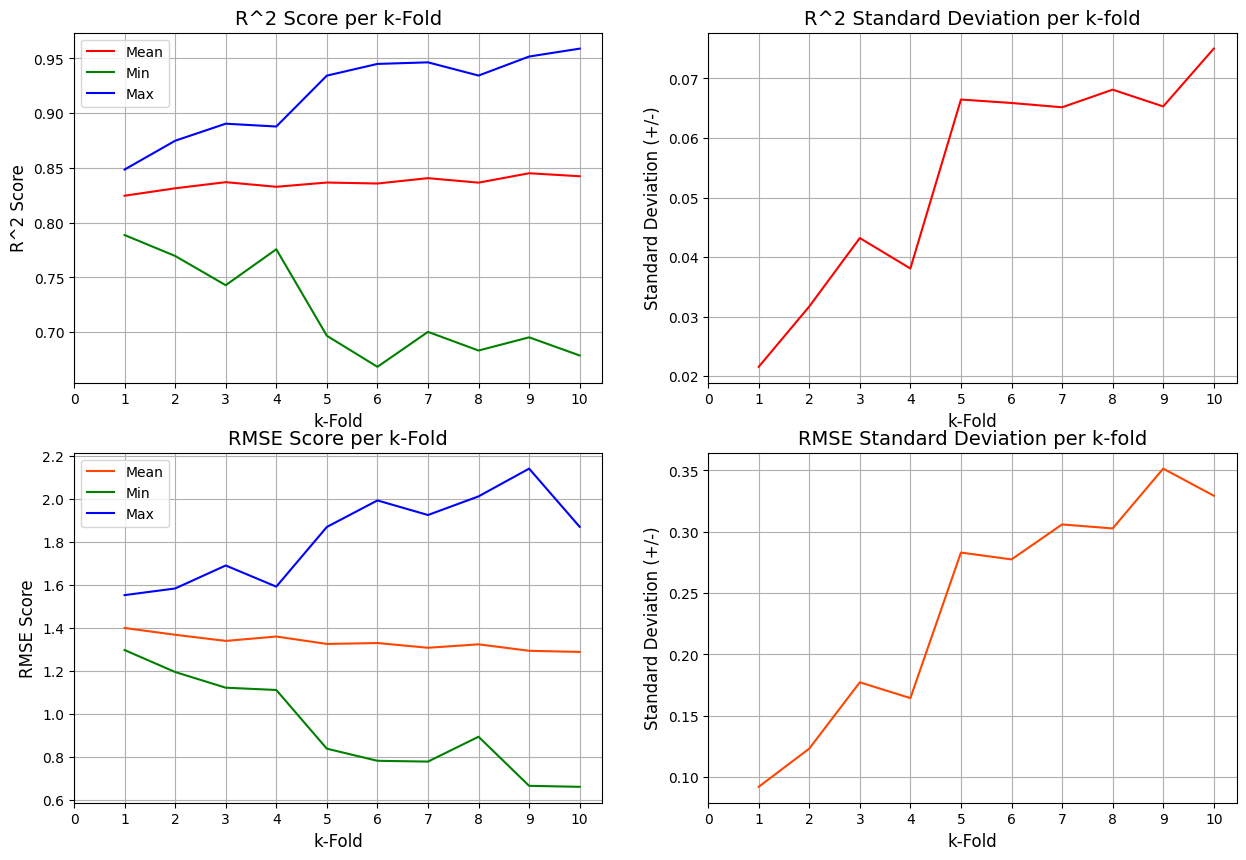

In [58]:
# XGBoost - k-Fold Cross Validation
xgb_cv = k_fold(xgb_reg, 10)

<table border = "1">
  <thead>
    <th colspan = "3">XGBoost Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.842</td>
      <td>1.290</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.075</td>
      <td>0.329</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.679</td>
      <td>0.663</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.959</td>
      <td>1.872</td>
    </tr>
  </tbody>
</table>

In [59]:
# Apply Grid Search for parameter tuning

# xgb_params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 
#               'learning_rate': [0.05, 0.1, 0.15],
#               'colsample_bytree': [0.3, 0.5, 0.7],
#               'n_estimators': [25, 50, 75, 100, 150, 200],
#               'min_child_weight': [1, 2, 4, 5, 8, 10],
#               'reg_alpha': [0.5, 1, 1.5, 2, 5, 10],
#               'gamma': [0, 0.1, 0.2, 0.3],
#               'subsample': [0.6, 0.8, 1.0],
#               'random_state': [0]}

xgb_params = {'max_depth': [2],
              'n_estimators': [21],
              'colsample_bytree': [0.9],
              'random_state': [0]}

# Perform Grid Search
if ((metric == "r2") or (metric == "rmse")):
  # R^2 Score
  xgb_grid_r2 = GridSearchCV(xgb_reg, xgb_params, scoring='r2', 
                              cv=xgb_cv, n_jobs=-1)
  results_r2 = xgb_grid_r2.fit(X_train, y_train)
  # RMSE
  xgb_grid_rmse = GridSearchCV(xgb_reg, xgb_params, 
                                scoring='neg_root_mean_squared_error', 
                                cv=xgb_cv, n_jobs=-1)
  results_rmse = xgb_grid_rmse.fit(X_train, y_train)

  # Summarize results
  best_r2 = xgb_grid_r2.best_score_
  best_rmse = np.abs(xgb_grid_rmse.best_score_)
  # Best scores
  print("Best R^2 Score: %.3f%%" % (best_r2 * 100))
  print("Best RMSE: %.3f" % (best_rmse))

  # Best parameters
  if (metric == "r2"):
    # R^2 Score
    best_parameters = xgb_grid_r2.best_params_
    print("Best Parameters (R^2): ", best_parameters)
  elif (metric == "rmse"):
    # RMSE
    best_parameters = xgb_grid_rmse.best_params_
    print("Best Parameters (RMSE): ", best_parameters)
else:
  # Invalid metric
  print("Invalid scoring metric!")

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklear

Best R^2 Score: 84.241%
Best RMSE: 1.290
Best Parameters (R^2):  {'colsample_bytree': 0.9, 'max_depth': 2, 'n_estimators': 21, 'random_state': 0}


<table border = "1">
  <thead>
    <th colspan = "2">XGBoost Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td colspan = "2"><b>Best Score:</b></td>
    </tr>
    <tr>
      <td><b>R^2</b></td>
      <td>84.241%</td>
    </tr>
    <tr>
      <td><b>RMSE</b></td>
      <td>1.290</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>colsample_bytree</b></td>
      <td>0.9</td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>2</td>
    </tr>
    <tr>
      <td><b>n_estimators</b></td>
      <td>21</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>0</td>
    </tr>
  </tbody>
</table>

## 6. Final Results

<table border = "1">
  <thead>
    <th colspan = "5">Final Regression Scores - Portuguese </th>
  </thead>
  <tbody>
    <tr>
      <td><b>Model</b></td>
      <td colspan = "2"><b>R^2</b></td>
      <td colspan = "2"><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b></b></td>
      <td><b>CV</b></td>
      <td><b>Val.</b></td>
      <td><b>CV</b></td>
      <td><b>Val.</b></td>
    </tr>
    <tr>
      <td><b>Linear Regression (LR)</b></td>
      <td>0.834</td>
      <td>0.818</td>
      <td>1.334</td>
      <td>1.136</td>
    </tr>
    <tr>
      <td><b>Linear SVR</b></td>
      <td>0.832</td>
      <td>0.862</td>
      <td>1.340</td>
      <td>0.991</td>
    </tr>
    <tr>
      <td><b>Decision Tree (DT)</b></td>
      <td>0.839</td>
      <td>0.833</td>
      <td>1.288</td>
      <td>1.088</td>
    </tr>
    <tr>
      <td><b>Random Forest (RF)</b></td>
      <td>0.845</td>
      <td>0.830</td>
      <td>1.280</td>
      <td>1.098</td>
    </tr>
    <tr>
      <td><b>XGBoost (XGB)</b></td>
      <td>0.842</td>
      <td>0.831</td>
      <td>1.290</td>
      <td>1.096</td>
    </tr>
  </tbody>
</table>

<ipython-input-60-0ea7c5f22003>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  overall_results = plt.plot(y_test, 'go--', color = 'red')


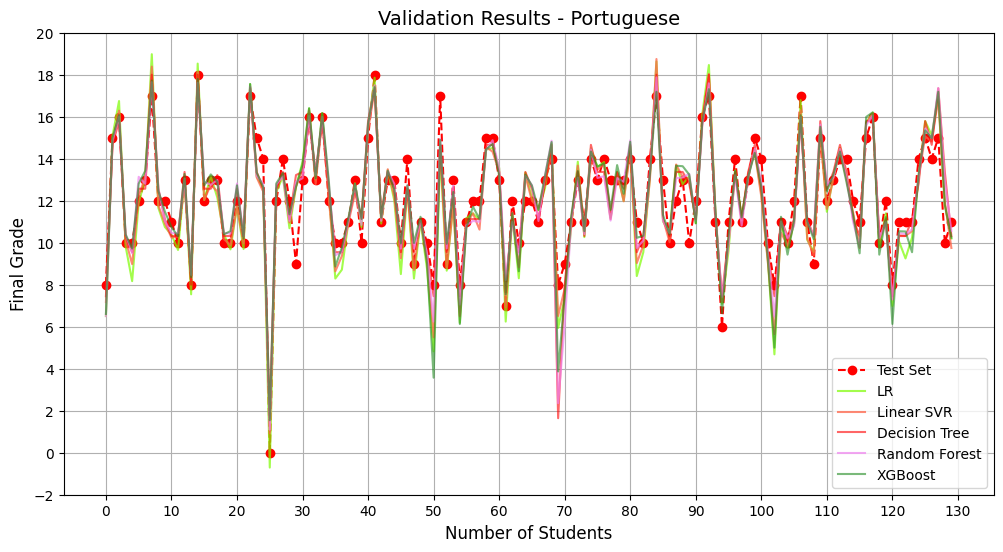

In [60]:
# Predicted vs Validation Results - Combined Distribution
overall_results = plt.figure(figsize=(12, 6))
# Labels for legend
model_labels = ['Test Set', 'LR', 'Linear SVR', 'Decision Tree', 'Random Forest', 
                'XGBoost']

# Test Set
overall_results = plt.plot(y_test, 'go--', color = 'red')
# LR
overall_results = plt.plot(lr_pred, color='lawngreen', alpha=0.7)
# Linear SVR
overall_results = plt.plot(linear_svr_pred, color='tomato', alpha=0.75)
# Decision Tree
overall_results = plt.plot(dt_pred, color='red', alpha=0.6)
# Random Forest
overall_results = plt.plot(rf_pred, color='violet', alpha=0.7)
# XGBoost
overall_results = plt.plot(xgb_pred, color='forestgreen', alpha=0.6)

# Adjust X and Y-Axis ranges
plt.xticks(np.arange(0, len(y_test)+10, 10))
plt.yticks(np.arange(-2, 22, 2))
# Plot title and labels
plt.xlabel('Number of Students', fontsize=12)
plt.ylabel('Final Grade', fontsize=12)
plt.title('Validation Results - Portuguese', fontsize=14)
# Plot legend and grid
plt.legend(labels=model_labels, loc='lower right')
plt.grid()

# Show subplot
plt.show()

<ipython-input-61-719c18c6e359>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  overall_results = plt.plot(y_test, 'go--', color = 'red')


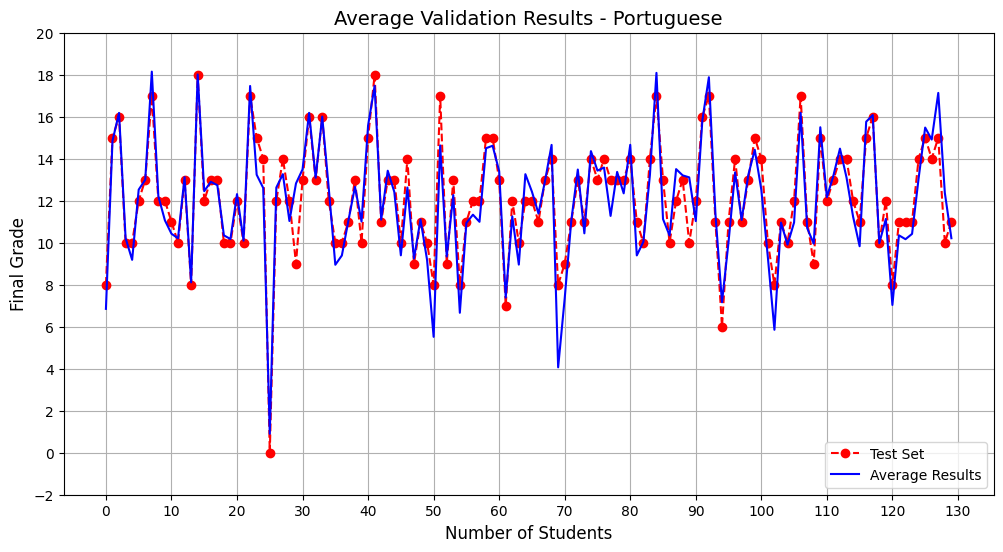

In [61]:
# Average Validation Results
average_results = plt.figure(figsize=(12, 6))
# Labels for legend
results_labels = ['Test Set', 'Average Results']

# Test Set
overall_results = plt.plot(y_test, 'go--', color = 'red')
# Compute Average Results
running_avg = []
for i in range(0, len(y_test)):
  running_avg.append( (lr_pred[i] + linear_svr_pred[i] + dt_pred[i] + rf_pred[i] 
                       + xgb_pred[i])/5 )
# Plot Average Results
avg_results = plt.plot(running_avg[0:len(y_test)], color='blue')

# Adjust X and Y-Axis ranges
plt.xticks(np.arange(0, len(y_test)+10, 10))
plt.yticks(np.arange(-2, 22, 2))
# Plot title and labels
plt.xlabel('Number of Students', fontsize=12)
plt.ylabel('Final Grade', fontsize=12)
plt.title('Average Validation Results - Portuguese', fontsize=14)
# Plot legend and grid
plt.legend(labels=results_labels, loc='lower right')
plt.grid()

# Show subplot
plt.show()

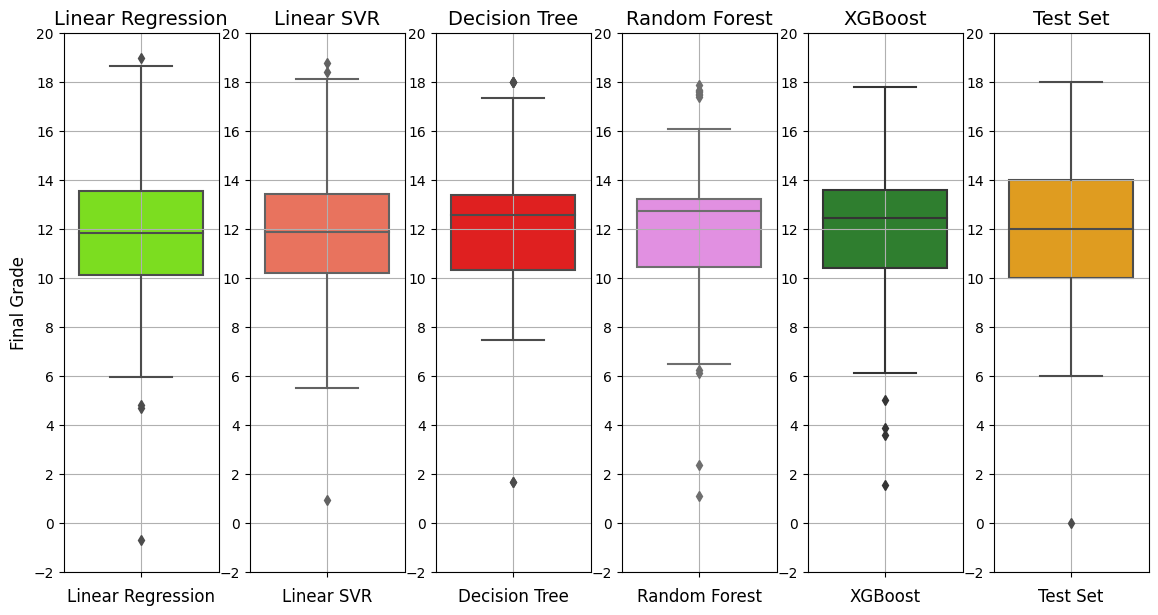

In [62]:
# Combines box plot distributions
box_plots_comb = plt.figure(figsize=(14, 7))

# Box plot for lr_pred
ax1 = box_plots_comb.add_subplot(1, 6, 1)
ax1 = sns.boxplot(y=lr_pred, color='lawngreen', orient='v')
# Adjust Y-Axis range
plt.yticks(np.arange(-2, 22, 2))
# Plot title and labels
plt.xlabel('Linear Regression', fontsize=12)
plt.ylabel('Final Grade', fontsize=12)
plt.title('Linear Regression', fontsize=14)
# Plot grid
plt.grid(True)

# Box plot for linear_svr_pred
ax2 = box_plots_comb.add_subplot(1, 6, 2)
ax2 = sns.boxplot(y=linear_svr_pred, color='tomato', orient='v')
# Adjust Y-Axis range
plt.yticks(np.arange(-2, 22, 2))
# Plot title and label
plt.xlabel('Linear SVR', fontsize=12)
plt.title('Linear SVR', fontsize=14)
# Plot grid
plt.grid(True)

# Box plot for dt_pred
ax3 = box_plots_comb.add_subplot(1, 6, 3)
ax3 = sns.boxplot(y=dt_pred, color='red', orient='v')
# Adjust Y-Axis range
plt.yticks(np.arange(-2, 22, 2))
# Plot title and label
plt.xlabel('Decision Tree', fontsize=12)
plt.title('Decision Tree', fontsize=14)
# Plot grid
plt.grid(True)

# Box plot for rf_pred
ax4 = box_plots_comb.add_subplot(1, 6, 4)
ax4 = sns.boxplot(y=rf_pred, color='violet', orient='v')
# Adjust Y-Axis range
plt.yticks(np.arange(-2, 22, 2))
# Plot title and label
plt.xlabel('Random Forest', fontsize=12)
plt.title('Random Forest', fontsize=14)
# Plot grid
plt.grid(True)

# Box plot for xgb_pred
ax5 = box_plots_comb.add_subplot(1, 6, 5)
ax5 = sns.boxplot(y=xgb_pred, color='forestgreen', orient='v')
# Adjust Y-Axis range
plt.yticks(np.arange(-2, 22, 2))
# Plot title and label
plt.xlabel('XGBoost', fontsize=12)
plt.title('XGBoost', fontsize=14)
# Plot grid
plt.grid(True)

# Box plot for y_test
ax6 = box_plots_comb.add_subplot(1, 6, 6)
ax6 = sns.boxplot(y=y_test, color='orange', orient='v')
# Adjust Y-Axis range
plt.yticks(np.arange(-2, 22, 2))
# Plot title and label
plt.xlabel('Test Set', fontsize=12)
plt.title('Test Set', fontsize=14)
# Plot grid
plt.grid(True)

# Show subplot
plt.show()